In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set2')
import os
# print(plt.style.available)

In [2]:
import missingno as msno

In [3]:
df_kiva_loans = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


<Axes: >

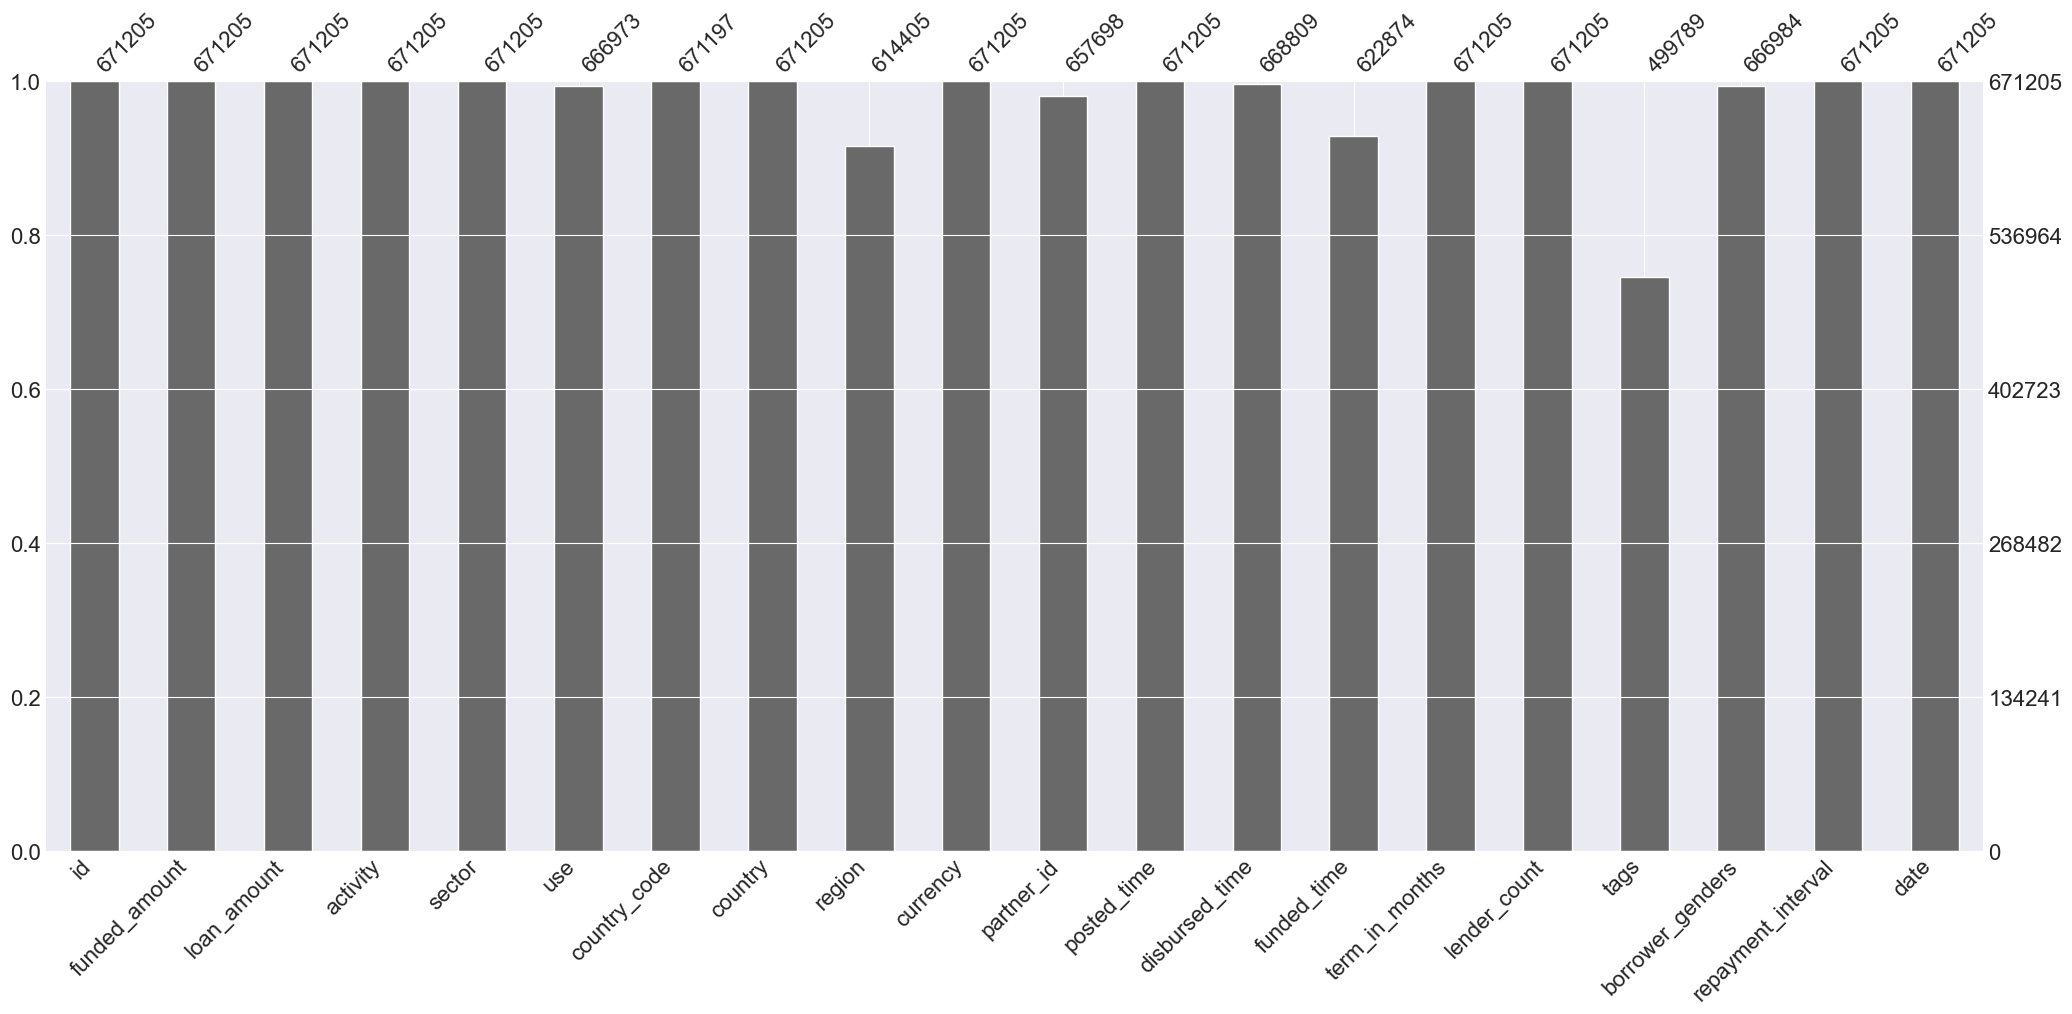

In [4]:
msno.bar(df_kiva_loans)

<Axes: >

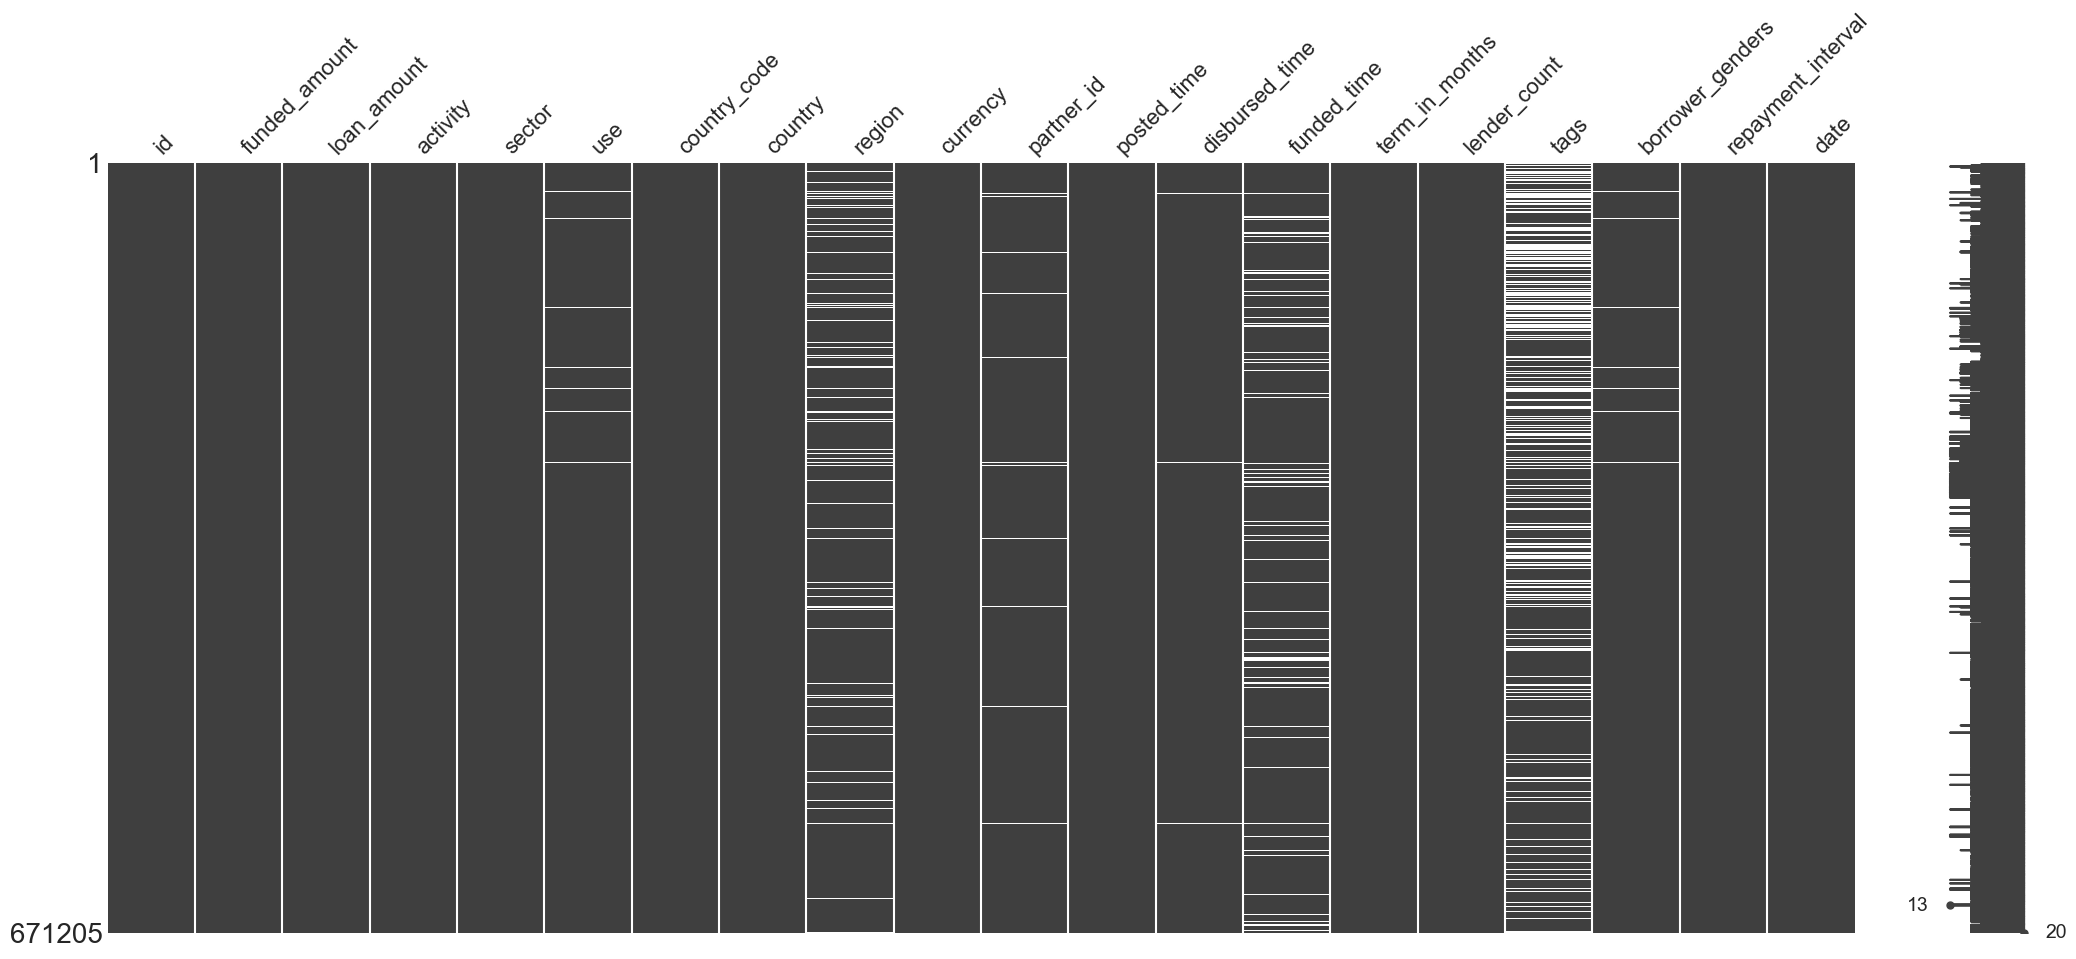

In [5]:
msno.matrix(df_kiva_loans)

In [6]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [7]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [8]:
df_kiva_loans.describe(include=[np.object_])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


In [5]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True) > 0.005]
countries

country
Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: count, dtype: int64

In [6]:
list_countries = list(countries.index)
list_countries

['Philippines',
 'Kenya',
 'El Salvador',
 'Cambodia',
 'Pakistan',
 'Peru',
 'Colombia',
 'Uganda',
 'Tajikistan',
 'Ecuador',
 'Paraguay',
 'Nicaragua',
 'India',
 'Vietnam',
 'Nigeria',
 'Bolivia',
 'Lebanon',
 'Armenia',
 'Palestine',
 'Samoa',
 'Guatemala',
 'Rwanda',
 'Mali',
 'Honduras',
 'Indonesia',
 'United States',
 'Kyrgyzstan',
 'Togo',
 'Mexico',
 'Sierra Leone',
 'Tanzania',
 'Ghana',
 'Jordan',
 'Zimbabwe',
 'Madagascar',
 'Liberia',
 'Haiti',
 'Mozambique']

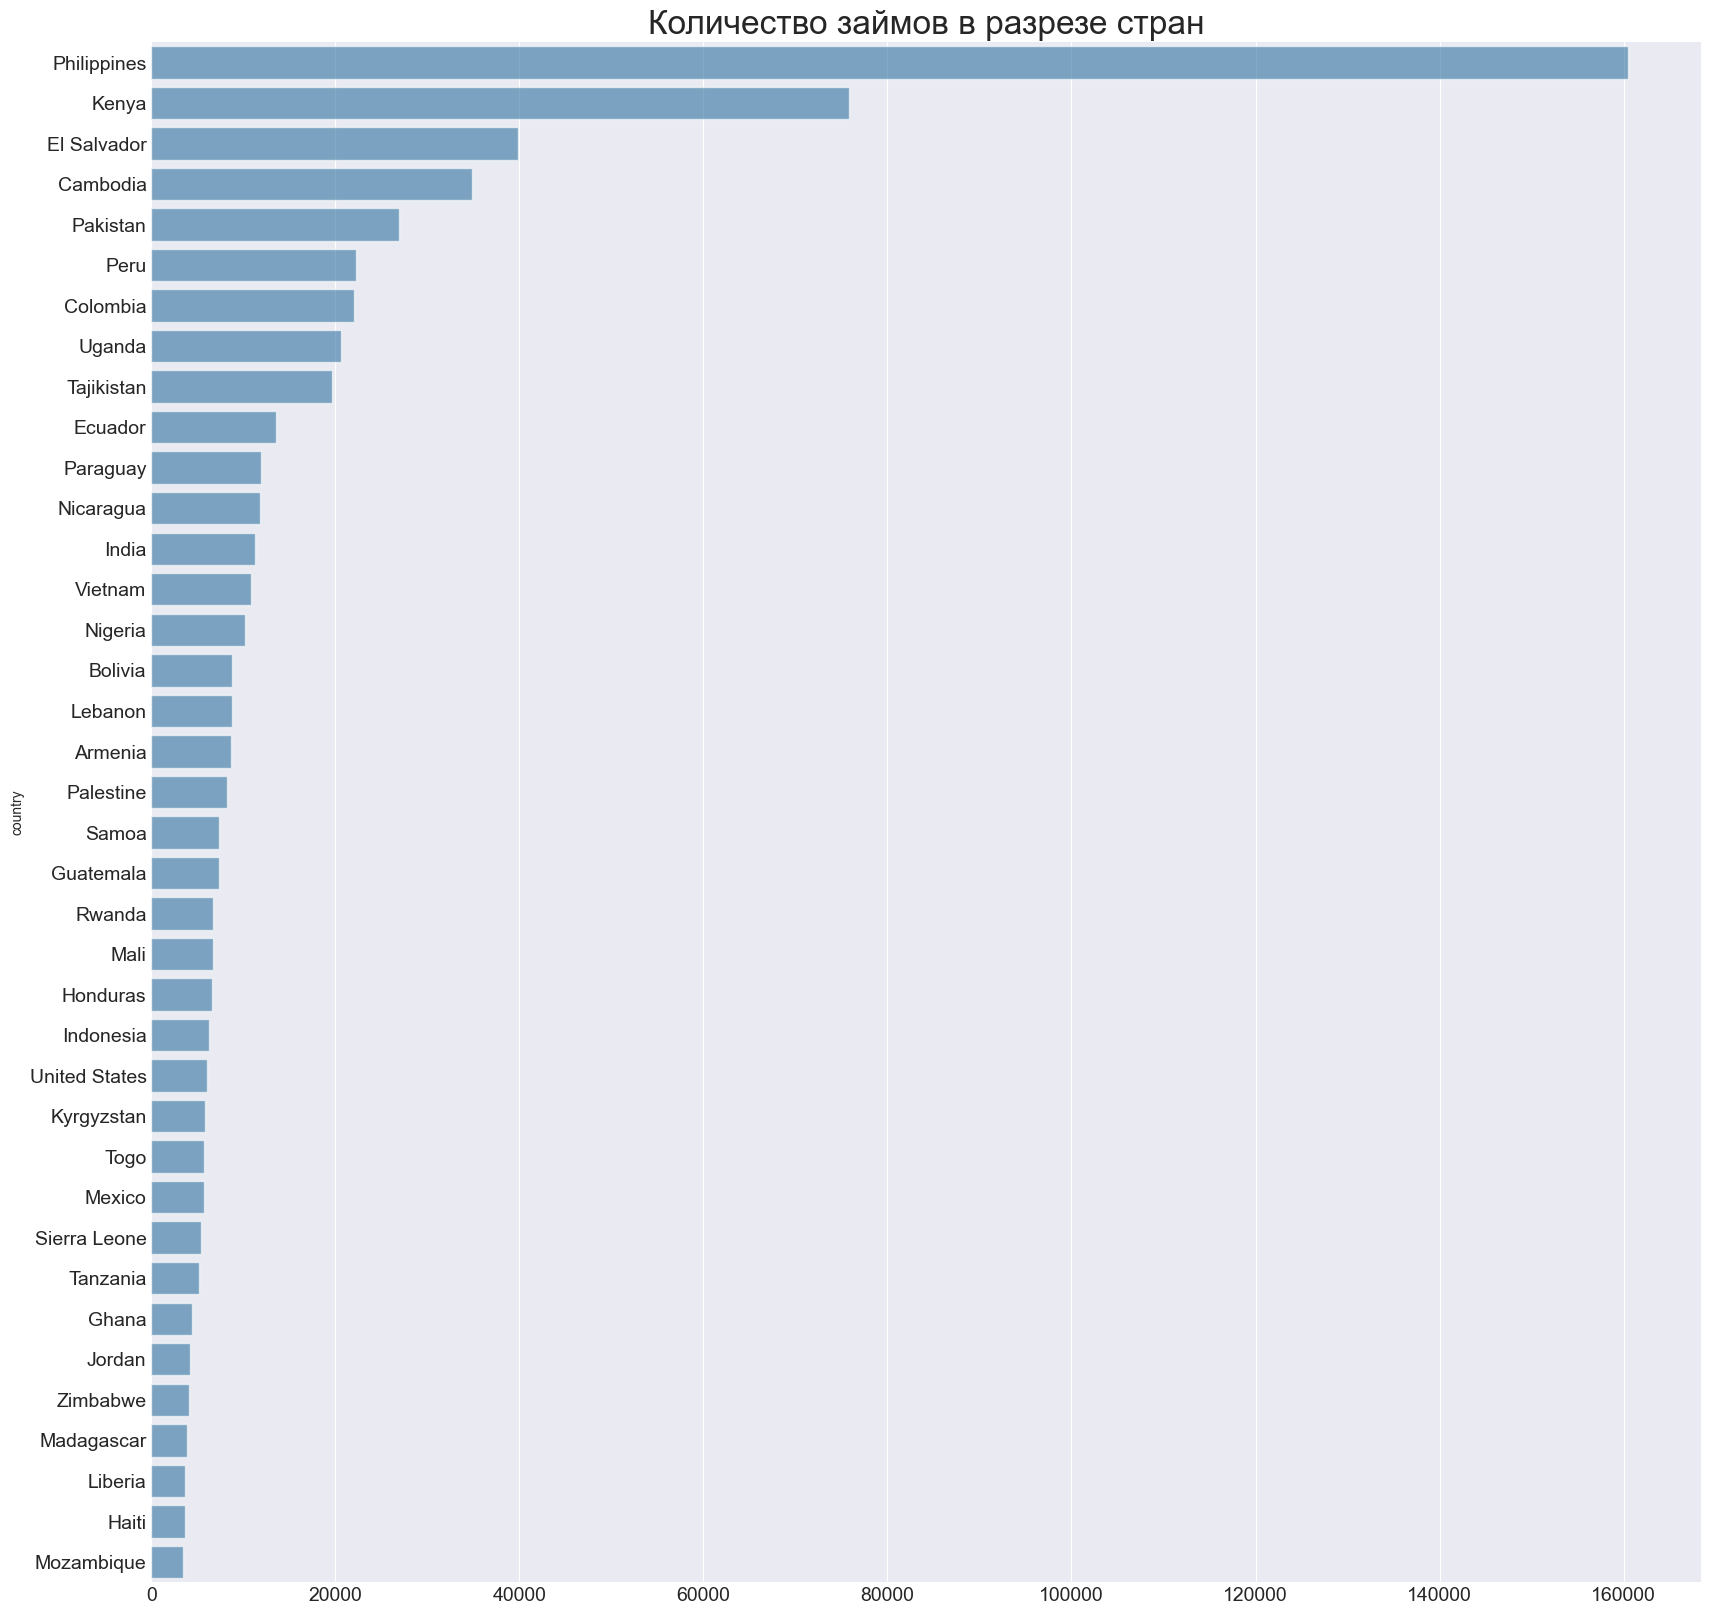

In [11]:
plt.figure(figsize=(20,20))
plt.title('Количество займов в разрезе стран', fontsize=24)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x= countries.values, alpha=0.6)
plt.show()

In [12]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [13]:
df_mpi_gouped = df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean().fillna(0).reset_index()
df_mpi_gouped

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


In [7]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_gouped, how='left', on='country')
df_kiva_loans

NameError: name 'df_mpi_gouped' is not defined

In [15]:
regions = df_kiva_loans['world_region'].value_counts()
regions

world_region
East Asia and the Pacific      206949
Sub-Saharan Africa             162903
Latin America and Caribbean    133759
Europe and Central Asia         38827
South Asia                      38815
Arab States                      9187
Name: count, dtype: int64

In [16]:
regions_list = regions.index.to_list()
regions_list

['East Asia and the Pacific',
 'Sub-Saharan Africa',
 'Latin America and Caribbean',
 'Europe and Central Asia',
 'South Asia',
 'Arab States']

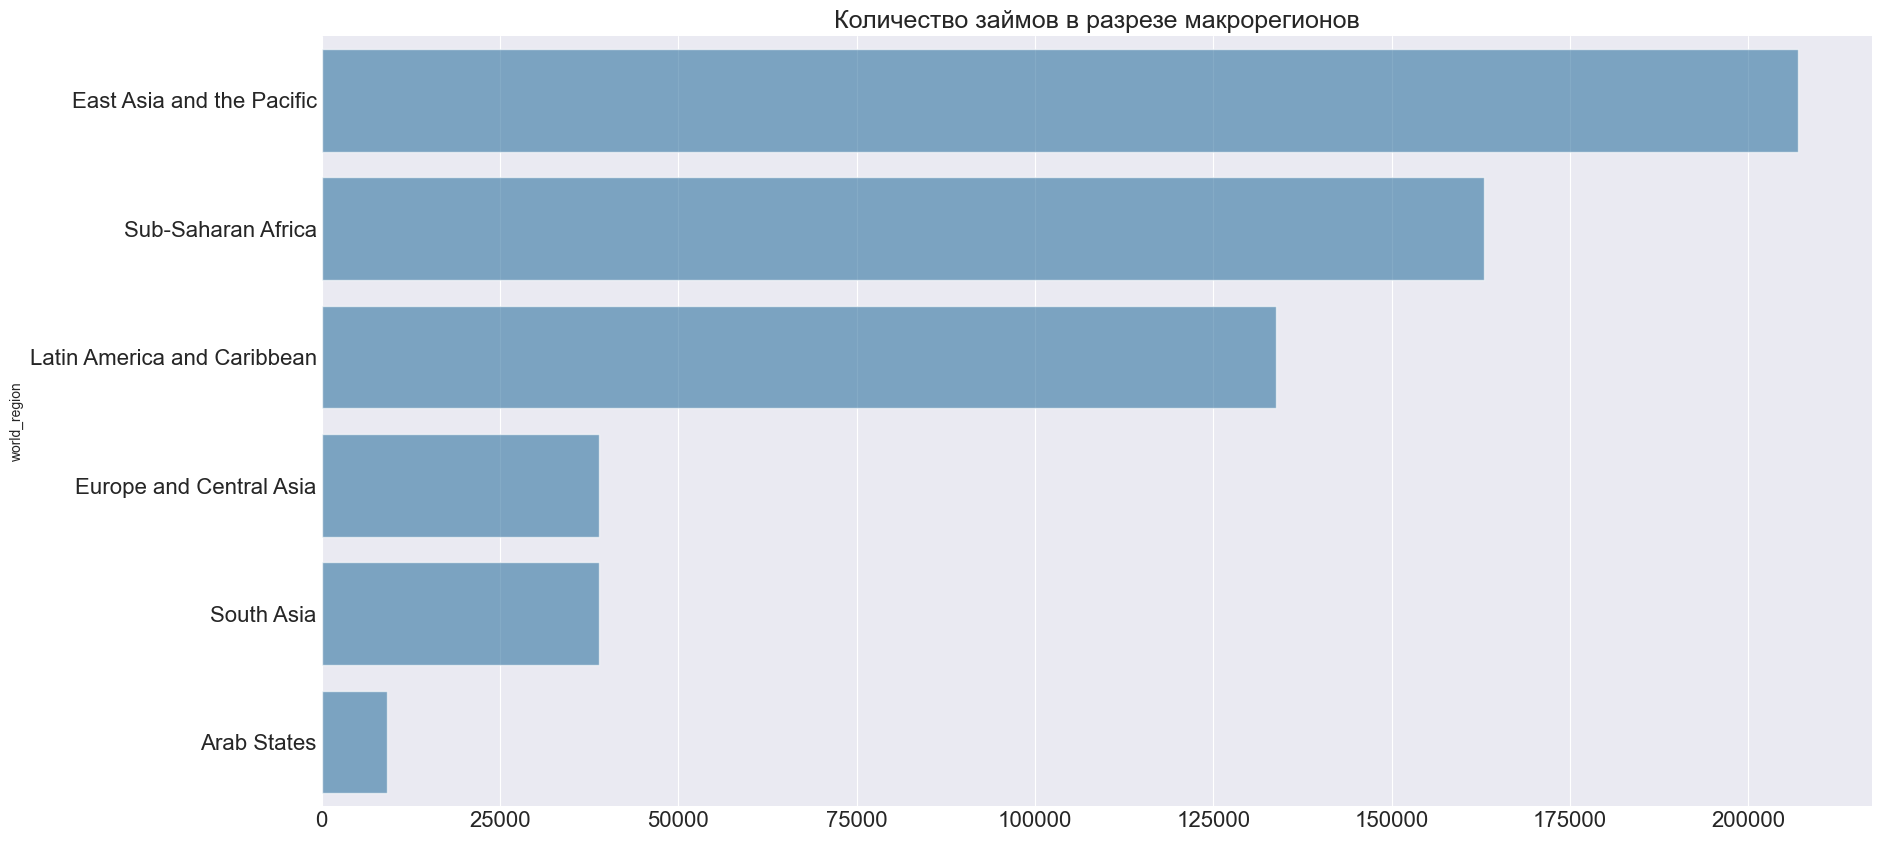

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title('Количество займов в разрезе макрорегионов', fontsize=18)
plt.tick_params(labelsize=16)
plt.show()

In [18]:
df_kiva_loans['borrower_genders'].value_counts()

borrower_genders
female                                                                                                                                                                                                                          426502
male                                                                                                                                                                                                                            134710
female, female                                                                                                                                                                                                                   12164
female, female, female                                                                                                                                                                                                           11676
female, female, female, female                             

In [10]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female', 'male'] else 'group' for elem in df_kiva_loans['borrower_genders']]
borrowers = df_kiva_loans['borrower_genders'].value_counts()
borrowers

borrower_genders
female    426502
male      134710
group     109993
Name: count, dtype: int64

<Axes: ylabel='count'>

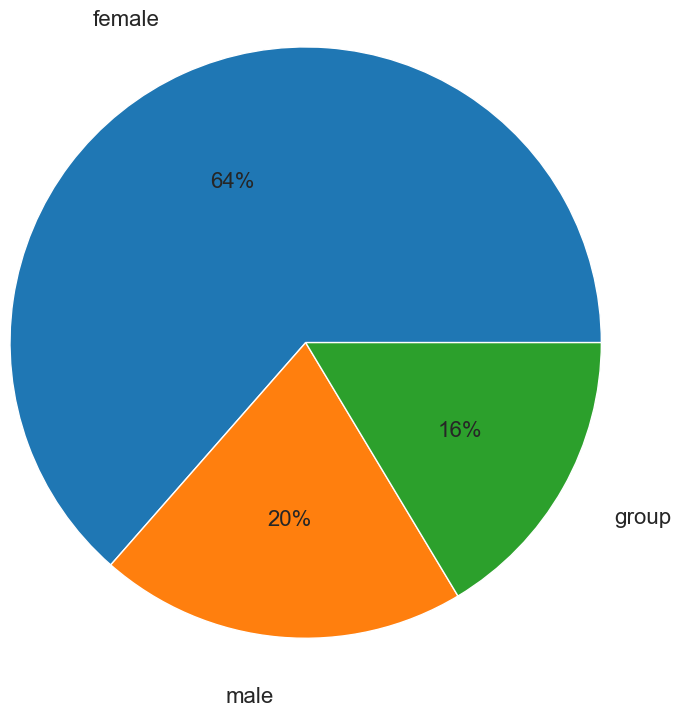

In [20]:
plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)
plot

In [21]:
#в каких странах подавляющее большинство заёмщиков - женщины?
countCountriesWithSex = df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)].groupby(['country', 'borrower_genders'])['borrower_genders'].count()
countCountriesWithSex

country   borrower_genders
Armenia   female              5383
          group                  3
          male                3245
Bolivia   female              3735
          group               2661
                              ... 
Vietnam   group               4606
          male                 489
Zimbabwe  female              2688
          group               1189
          male                 157
Name: borrower_genders, Length: 114, dtype: int64

In [22]:
df_gender_by_country = countCountriesWithSex.groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack('borrower_genders').fillna(0).sort_values(by=['female', 'male'])[-20:]
df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]
df_gender_by_country

,borrower_genders,female,male,group
country,country,,,
Sierra Leone,Sierra Leone,57.266851,7.959372,34.773777
Indonesia,Indonesia,58.046347,21.097522,20.856131
Colombia,Colombia,58.458741,38.008638,3.532621
El Salvador,El Salvador,58.771160,39.791850,1.436991
Lebanon,Lebanon,60.748408,27.070064,12.181529
Armenia,Armenia,62.368208,37.597034,0.034758
Jordan,Jordan,63.618910,34.557235,1.823854
Kenya,Kenya,65.570722,19.564787,14.864491
Zimbabwe,Zimbabwe,66.633614,3.891919,29.474467


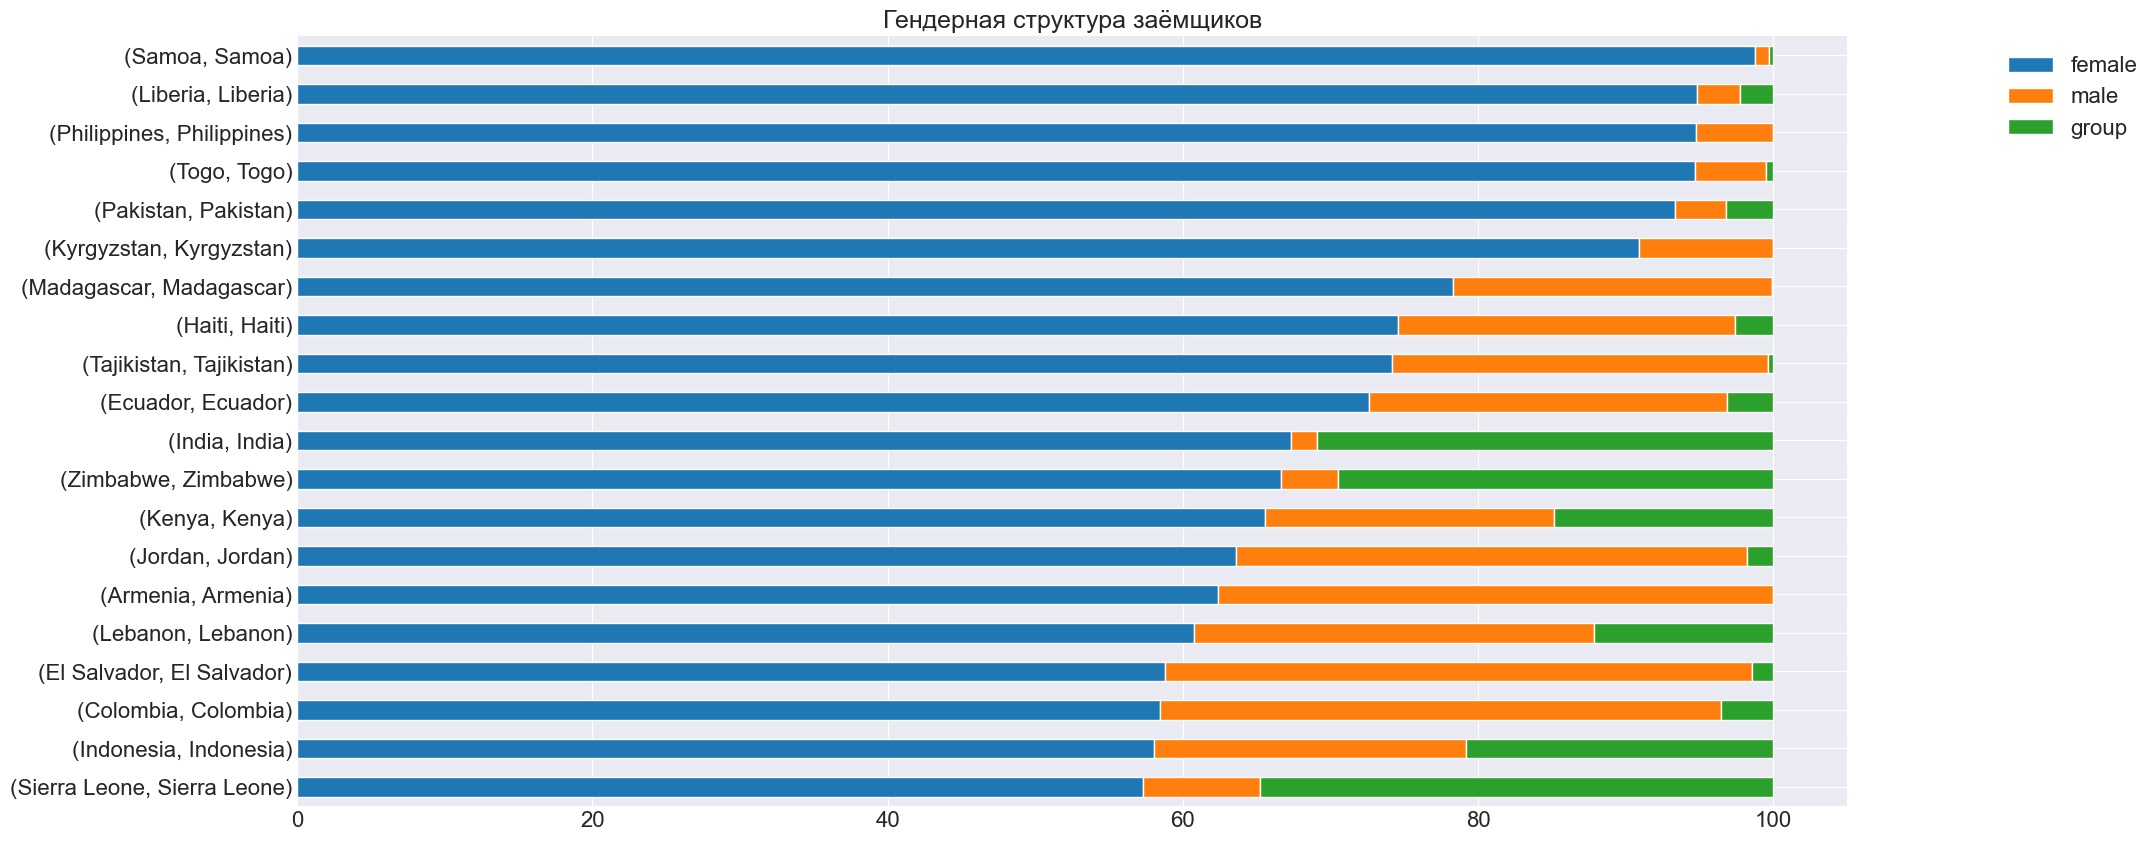

In [23]:
plot = df_gender_by_country.plot.barh(figsize=(20,10), fontsize=16, stacked=True, title='Гендерная структура заёмщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2,1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

# в каких странах подавляющее большинство заёмщиков - мужчины?

In [24]:
df_gender_by_country = countCountriesWithSex.groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack('borrower_genders').fillna(0).sort_values(by=['male'])
df_gender_by_country = df_gender_by_country[(df_gender_by_country['male'] > df_gender_by_country['female']) & (df_gender_by_country['male'] > df_gender_by_country['group'])]
df_gender_by_country = df_gender_by_country[['male', 'female', 'group']]
df_gender_by_country

,borrower_genders,male,female,group
country,country,,,
Mexico,Mexico,34.767462,34.488765,30.743773
Uganda,Uganda,48.701519,39.876705,11.421776
Palestine,Palestine,64.601445,35.214889,0.183666
Nigeria,Nigeria,87.134964,11.986977,0.878058


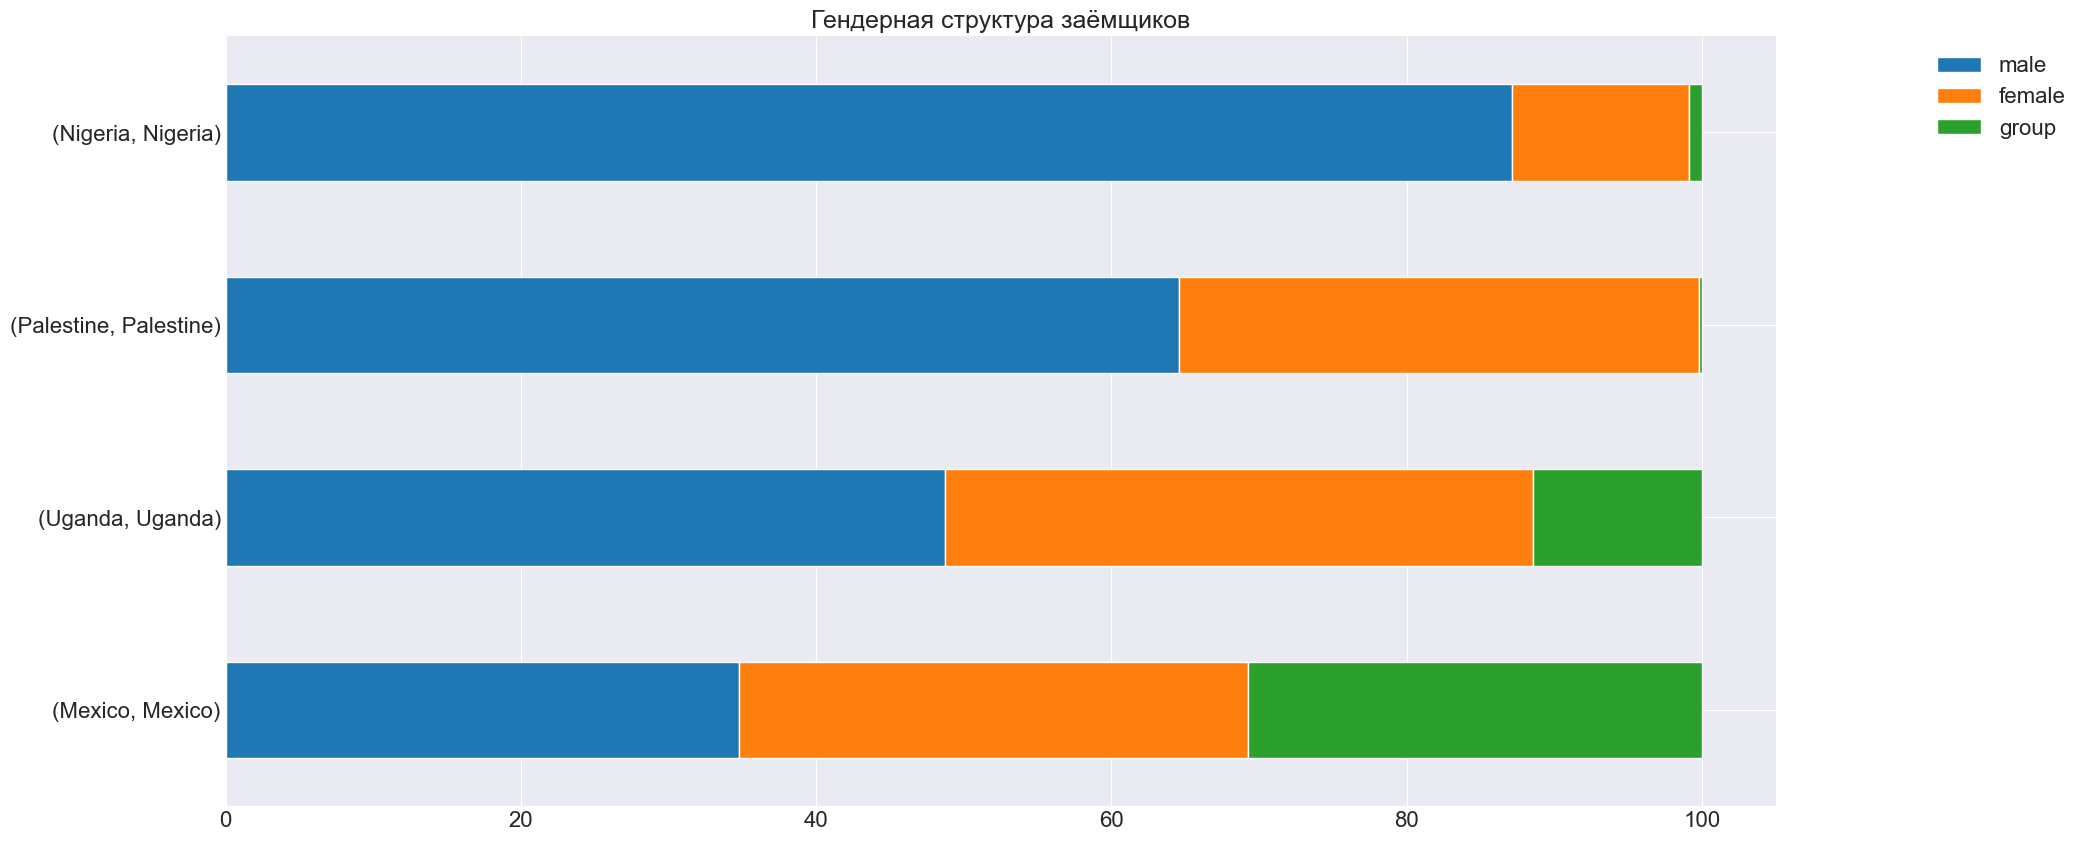

In [25]:
plot = df_gender_by_country.plot.barh(figsize=(20,10), fontsize=16, stacked=True, title='Гендерная структура заёмщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2,1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [26]:
sectors = df_kiva_loans['sector'].value_counts()
sectors

sector
Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: count, dtype: int64

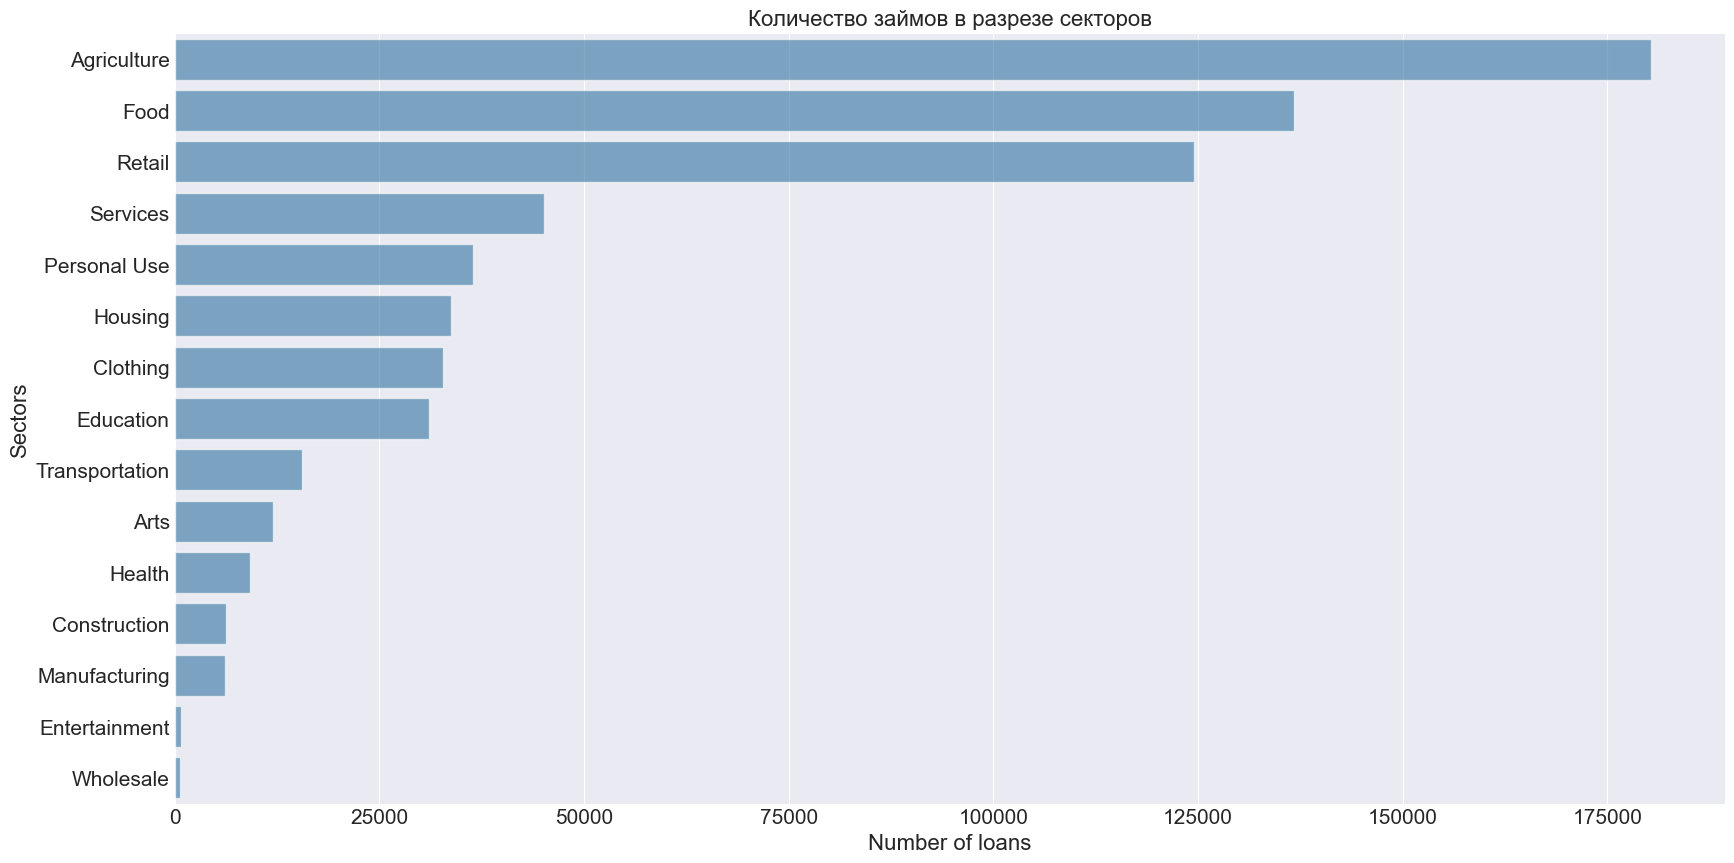

In [27]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов", fontsize=16)
plt.xlabel('Number of loans', fontsize=16)
plt.ylabel('Sectors', fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

In [28]:
activities = df_kiva_loans['activity'].value_counts().head(30)
activities

activity
Farming                           72955
General Store                     64729
Personal Housing Expenses         32448
Food Production/Sales             28106
Agriculture                       27023
Pigs                              26624
Retail                            24771
Clothing Sales                    22339
Home Appliances                   20267
Higher education costs            19742
Fruits & Vegetables               16610
Grocery Store                     15102
Livestock                         13095
Fish Selling                      13060
Food                              10197
Fishing                           10066
Services                           9807
Poultry                            9783
Tailoring                          9657
Animal Sales                       9237
Food Stall                         8905
Sewing                             8414
Dairy                              7914
Cereals                            7898
Cattle                         

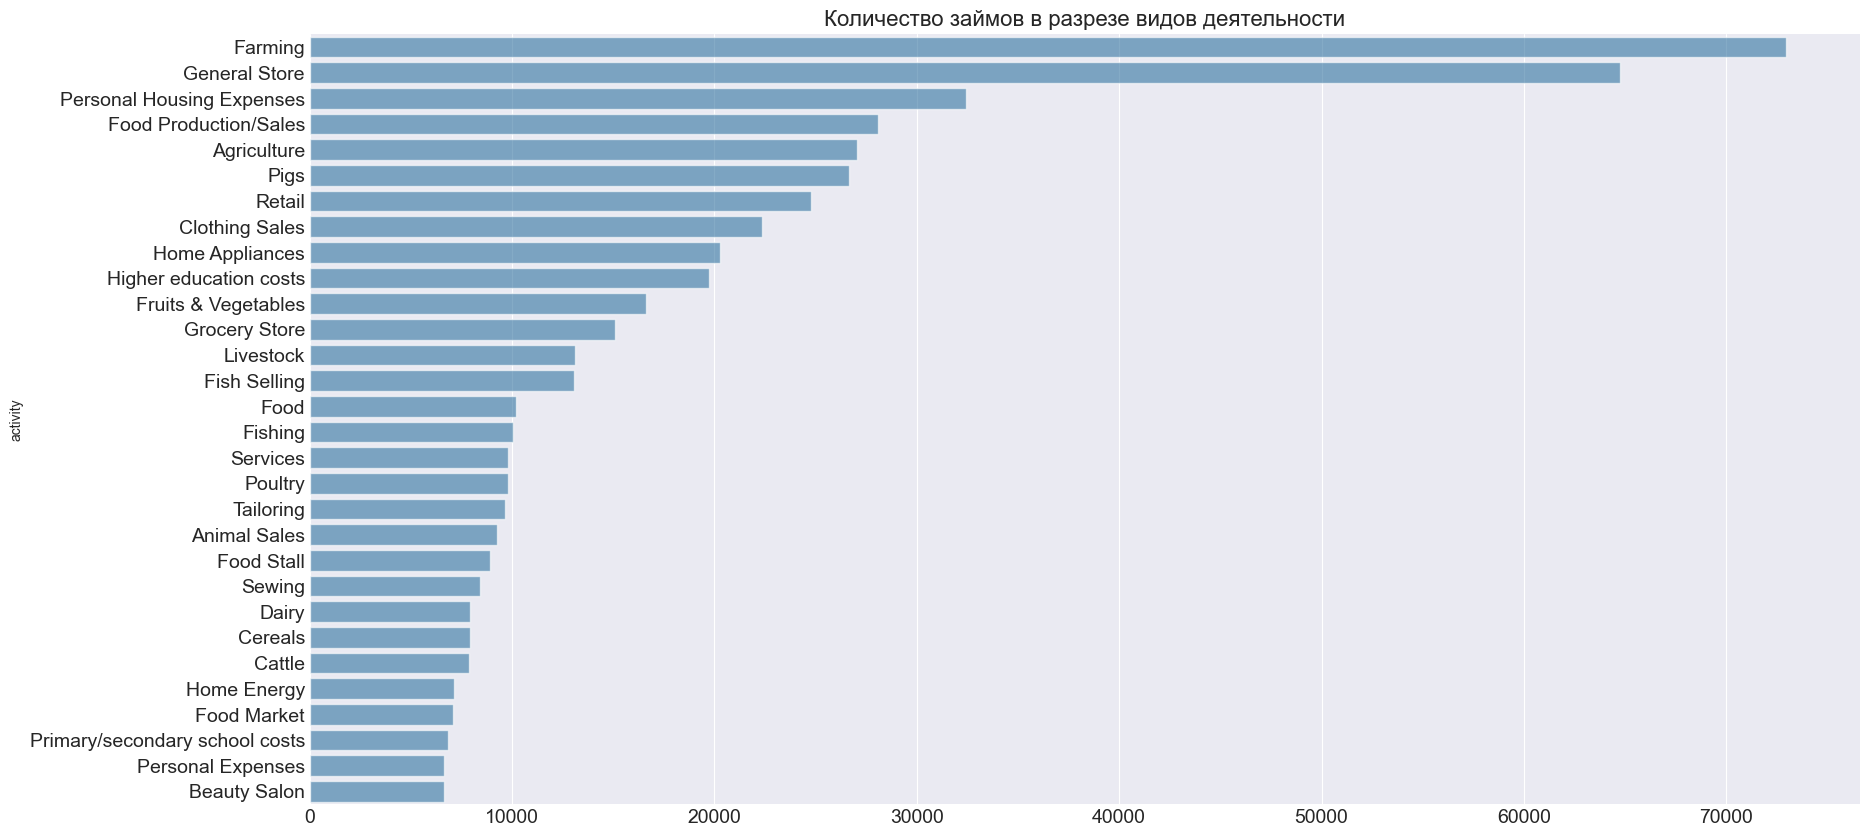

In [29]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show()

In [30]:
activities = df_kiva_loans['use'].value_counts().head(25)
activities

use
to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                

In [31]:
loans_by_activity_sector = df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)].groupby(['sector', 'activity'])['loan_amount'].count().reset_index()
loans_by_activity_sector

,sector,activity,loan_amount
0,Agriculture,Agriculture,27023
1,Agriculture,Animal Sales,9237
2,Agriculture,Aquaculture,108
3,Agriculture,Beekeeping,50
4,Agriculture,Cattle,7865
...,...,...,...
124,Services,Water Distribution,564
125,Transportation,Motorcycle Transport,5888
126,Transportation,Rickshaw,2878
127,Transportation,Taxi,2631


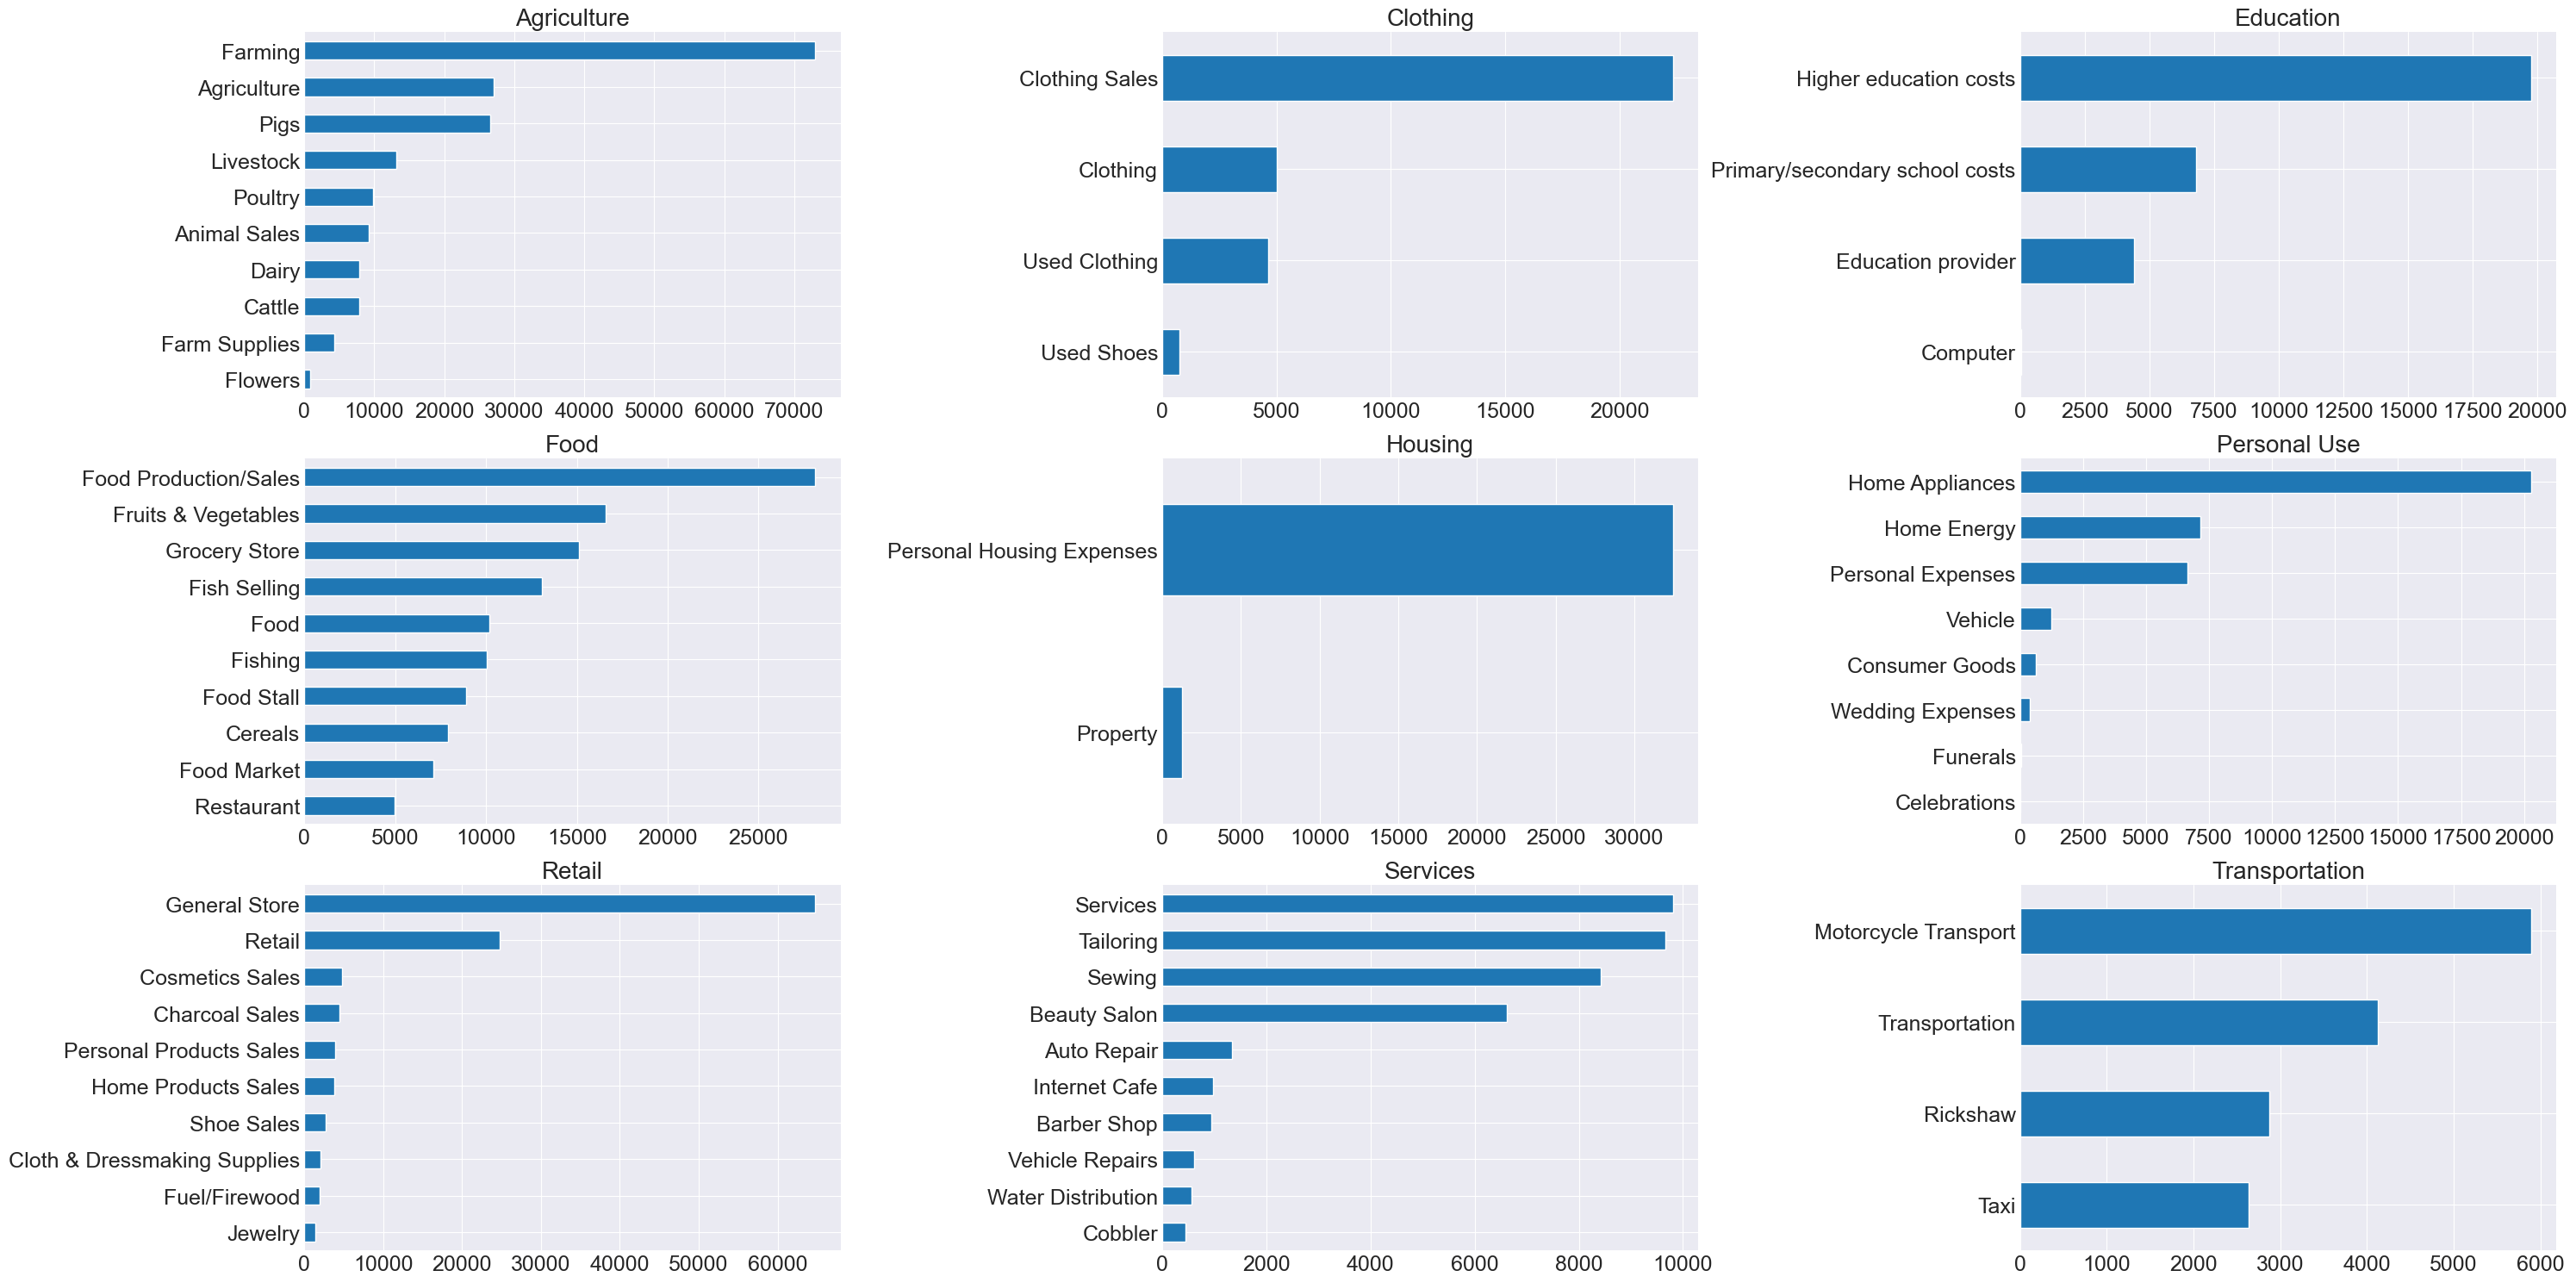

In [32]:
fig, axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))
for ax, q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)].dropna().sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

# в каких странах подавляющее большинство заёмщиков - группы?

In [33]:
df_gender_by_country = countCountriesWithSex.groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack('borrower_genders').fillna(0).sort_values(by=['male'])
df_gender_by_country = df_gender_by_country[(df_gender_by_country['group'] > df_gender_by_country['female']) & (df_gender_by_country['group'] > df_gender_by_country['male'])]
df_gender_by_country = df_gender_by_country[['group', 'female', 'male']]
df_gender_by_country

,borrower_genders,group,female,male
country,country,,,
Mali,Mali,91.836120,3.328815,4.835066
Cambodia,Cambodia,73.682398,20.949592,5.368010
Tanzania,Tanzania,59.149262,30.503928,10.346810
Ghana,Ghana,57.933242,25.971651,16.095107
Paraguay,Paraguay,55.053348,25.817021,19.129631
Guatemala,Guatemala,62.640219,17.045144,20.314637
Rwanda,Rwanda,42.746845,34.387528,22.865627


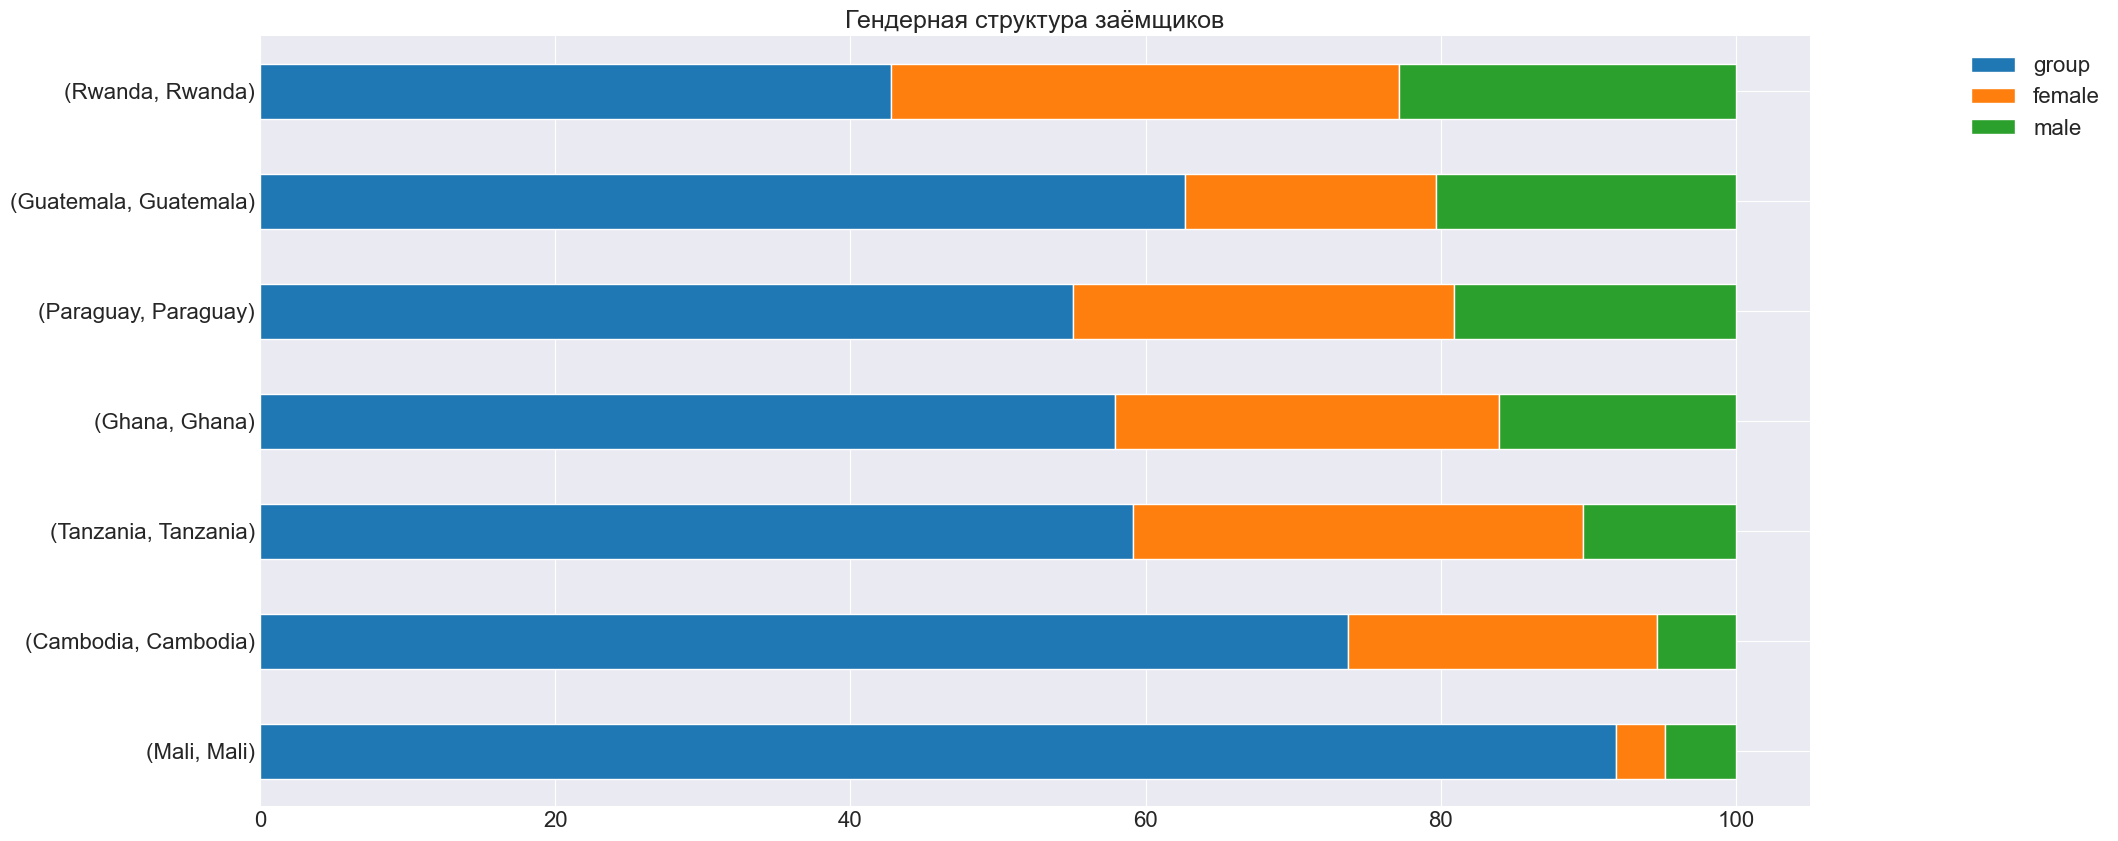

In [34]:
plot = df_gender_by_country.plot.barh(figsize=(20,10), fontsize=16, stacked=True, title='Гендерная структура заёмщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2,1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

# 2.4. Объём финансирования
## 2.4.1 Распределение суммы займа

C:\Users\Strannik\AppData\Local\Temp\ipykernel_9832\60328901.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)


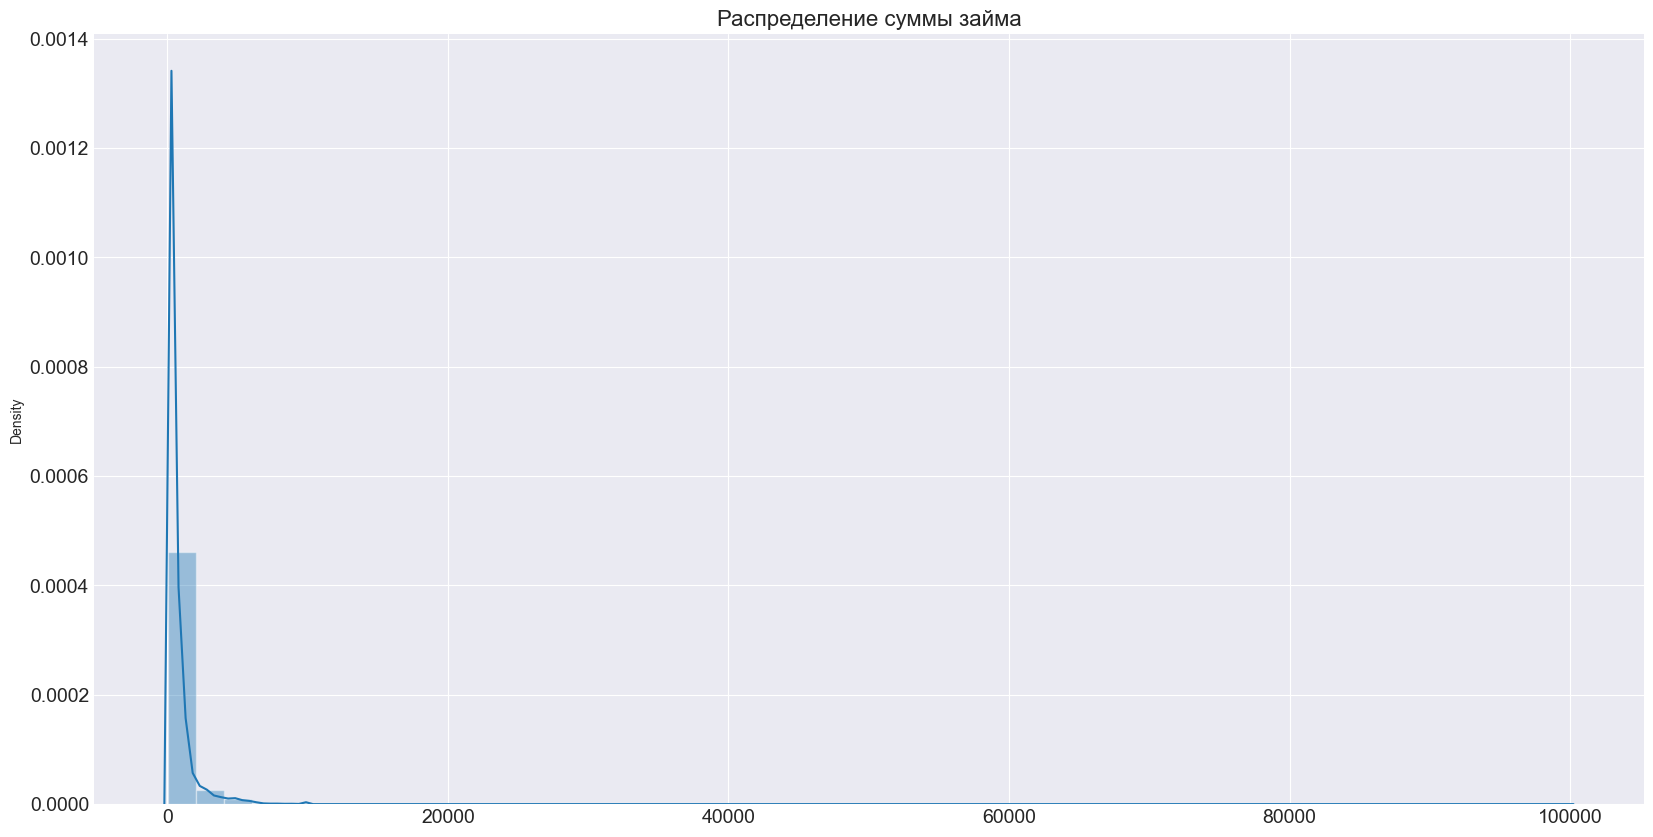

In [35]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

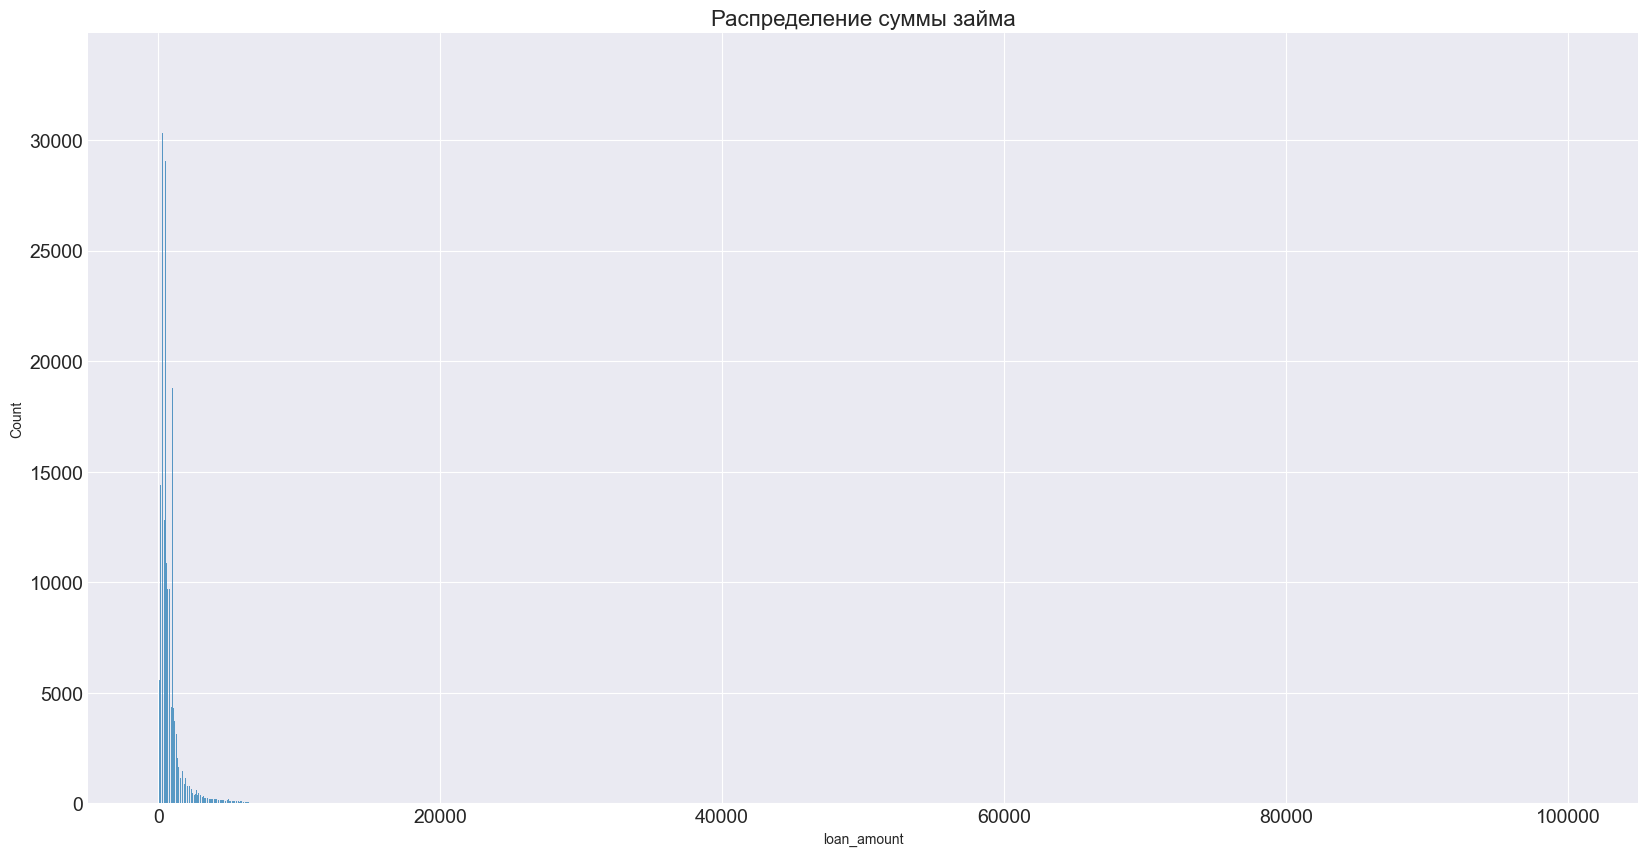

In [36]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)
sns.histplot(df_kiva_loans['loan_amount'])
plt.show()

In [37]:
n = df_kiva_loans.shape[0]
mid = df_kiva_loans['loan_amount'].mean()
mediana = df_kiva_loans['loan_amount'].median()
# df_kiva_loans['loan_amount_mean_razn'] = df_kiva_loans['loan_amount'] - mid
triSigma = 3 * math.sqrt((sum((df_kiva_loans['loan_amount'] - mid) ** 2)) / (n - 1))
print(triSigma, mediana, mid)

df_kiva_loans_trimmed = df_kiva_loans[(df_kiva_loans['loan_amount'] < (mediana + triSigma)) & (df_kiva_loans['loan_amount'] > (mediana - triSigma))]
df_kiva_loans_trimmed

3595.980218648837 500.0 842.3971066961659


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,group,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


C:\Users\Strannik\AppData\Local\Temp\ipykernel_9832\1977643836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)


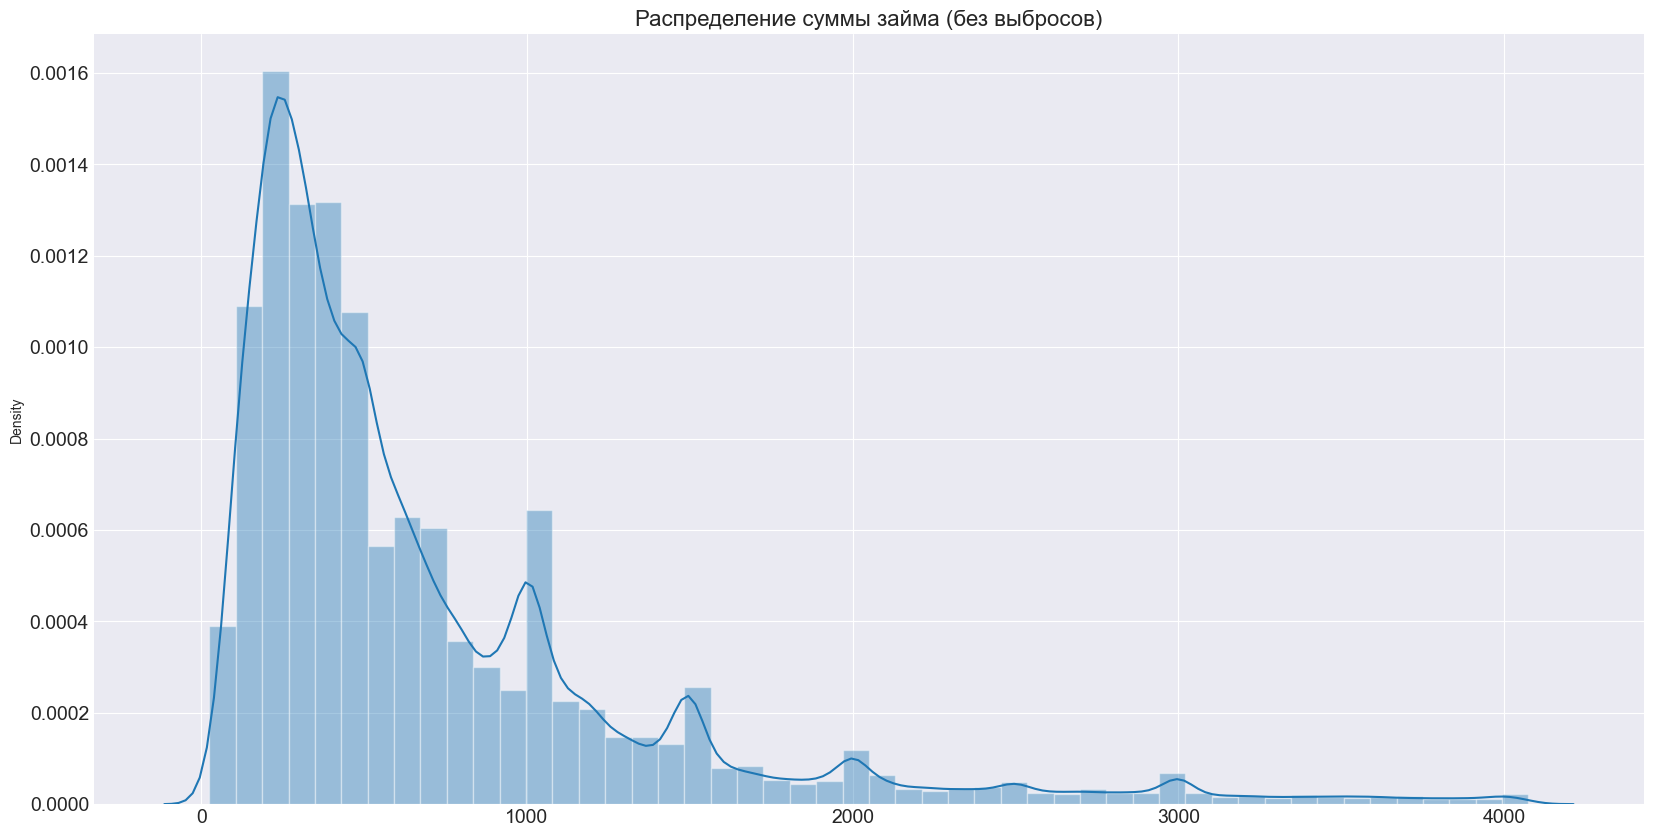

In [38]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

## 2.4.2 Суммы займа в разрезе секторов

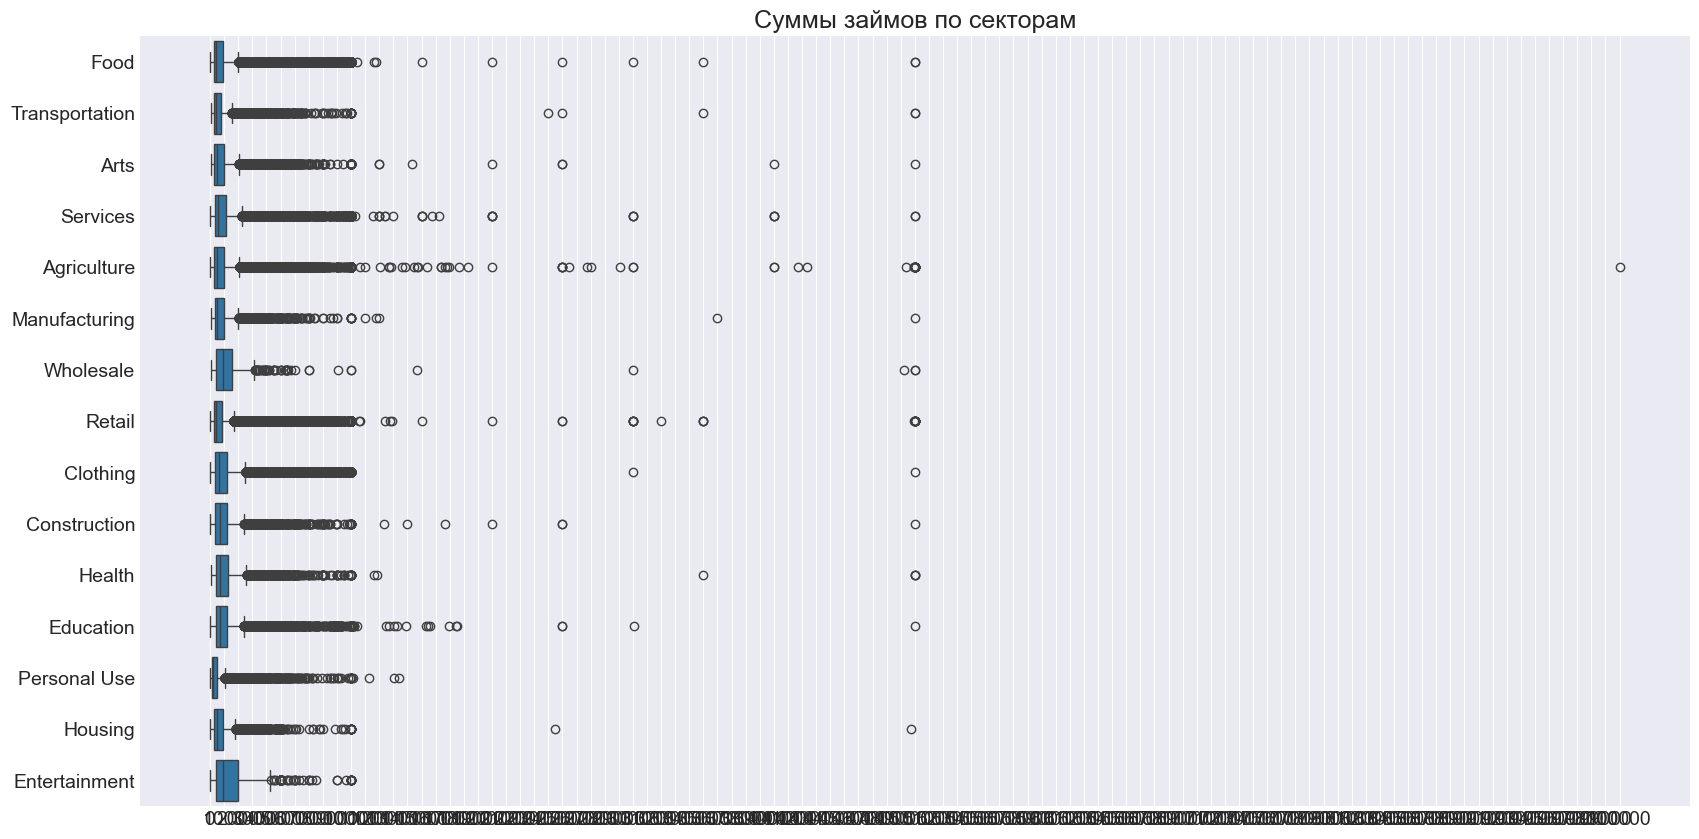

In [39]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount'] + 1), 1000))
plt.tick_params(labelsize=14)
sns.boxplot(x='loan_amount', y='sector', data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

## Изучить несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей

In [40]:
df_kiva_loans_trimmed_hight = df_kiva_loans.sort_values('loan_amount', ascending=False)[:100]
df_kiva_loans_trimmed_hight

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,...,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10,HTI,Latin America and Caribbean,0.293800
408465,1055190,50000.0,50000.0,Construction,Construction,NaN,PE,Peru,NaN,USD,...,2016-05-17 16:30:32+00:00,73.0,1310,"#Eco-friendly, #Job Creator, #Biz Durable Asse...",group,irregular,2016-04-15,PER,Latin America and Caribbean,0.053080
583307,1245201,50000.0,50000.0,Agriculture,Agriculture,to support 800+ farmers by improving their pro...,GT,Guatemala,Quetzaltenango,USD,...,2017-03-22 23:32:13+00:00,20.0,1671,"user_favorite, user_favorite, user_favorite, u...",male,monthly,2017-02-23,GTM,Latin America and Caribbean,0.113957
126839,777718,50000.0,50000.0,Agriculture,Agriculture,to buy and plant resin producing pine trees. T...,MX,Mexico,Cherán,USD,...,2014-12-07 17:02:10+00:00,144.0,586,"user_favorite, user_favorite, #Biz Durable Ass...",group,irregular,2014-10-01,MEX,Latin America and Caribbean,0.000000
447374,1107992,50000.0,50000.0,Agriculture,Agriculture,to increase smallholder farmers’ incomes by bu...,UG,Uganda,Kampala,USD,...,2016-07-18 01:15:54+00:00,13.0,1555,"user_favorite, #Eco-friendly, #Sustainable Ag,...",male,monthly,2016-06-28,UGA,Sub-Saharan Africa,0.375300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541650,1202327,24450.0,24450.0,Property,Housing,NaN,MX,Mexico,NaN,MXN,...,2017-01-04 11:24:09+00:00,22.0,762,"user_favorite, user_favorite, #Job Creator, #J...",group,irregular,2016-12-12,MEX,Latin America and Caribbean,0.000000
243401,890889,24000.0,24000.0,Transportation,Transportation,to purchase a delivery truck to deliver water ...,LA,Lao People's Democratic Republic,Thakek,USD,...,2015-06-06 16:22:58+00:00,38.0,761,"#Biz Durable Asset, #Low-profit FP, #Health an...",male,irregular,2015-05-25,LAO,East Asia and the Pacific,0.183529
36570,689415,20000.0,20000.0,Bakery,Food,to purchase a vehicle to distribute her local ...,IQ,Iraq,NaN,USD,...,2014-04-16 20:57:31+00:00,26.0,686,"user_favorite, user_favorite, #Biz Durable Ass...",female,monthly,2014-03-26,IRQ,Arab States,0.050222
491191,1150883,20000.0,20000.0,Construction,Construction,"to buy a pickup truck, hire more local staff, ...",BR,Brazil,São Paulo,USD,...,2016-09-22 01:22:53+00:00,61.0,518,"user_favorite, user_favorite, #Biz Durable Ass...",male,monthly,2016-09-15,BRA,Latin America and Caribbean,0.027259


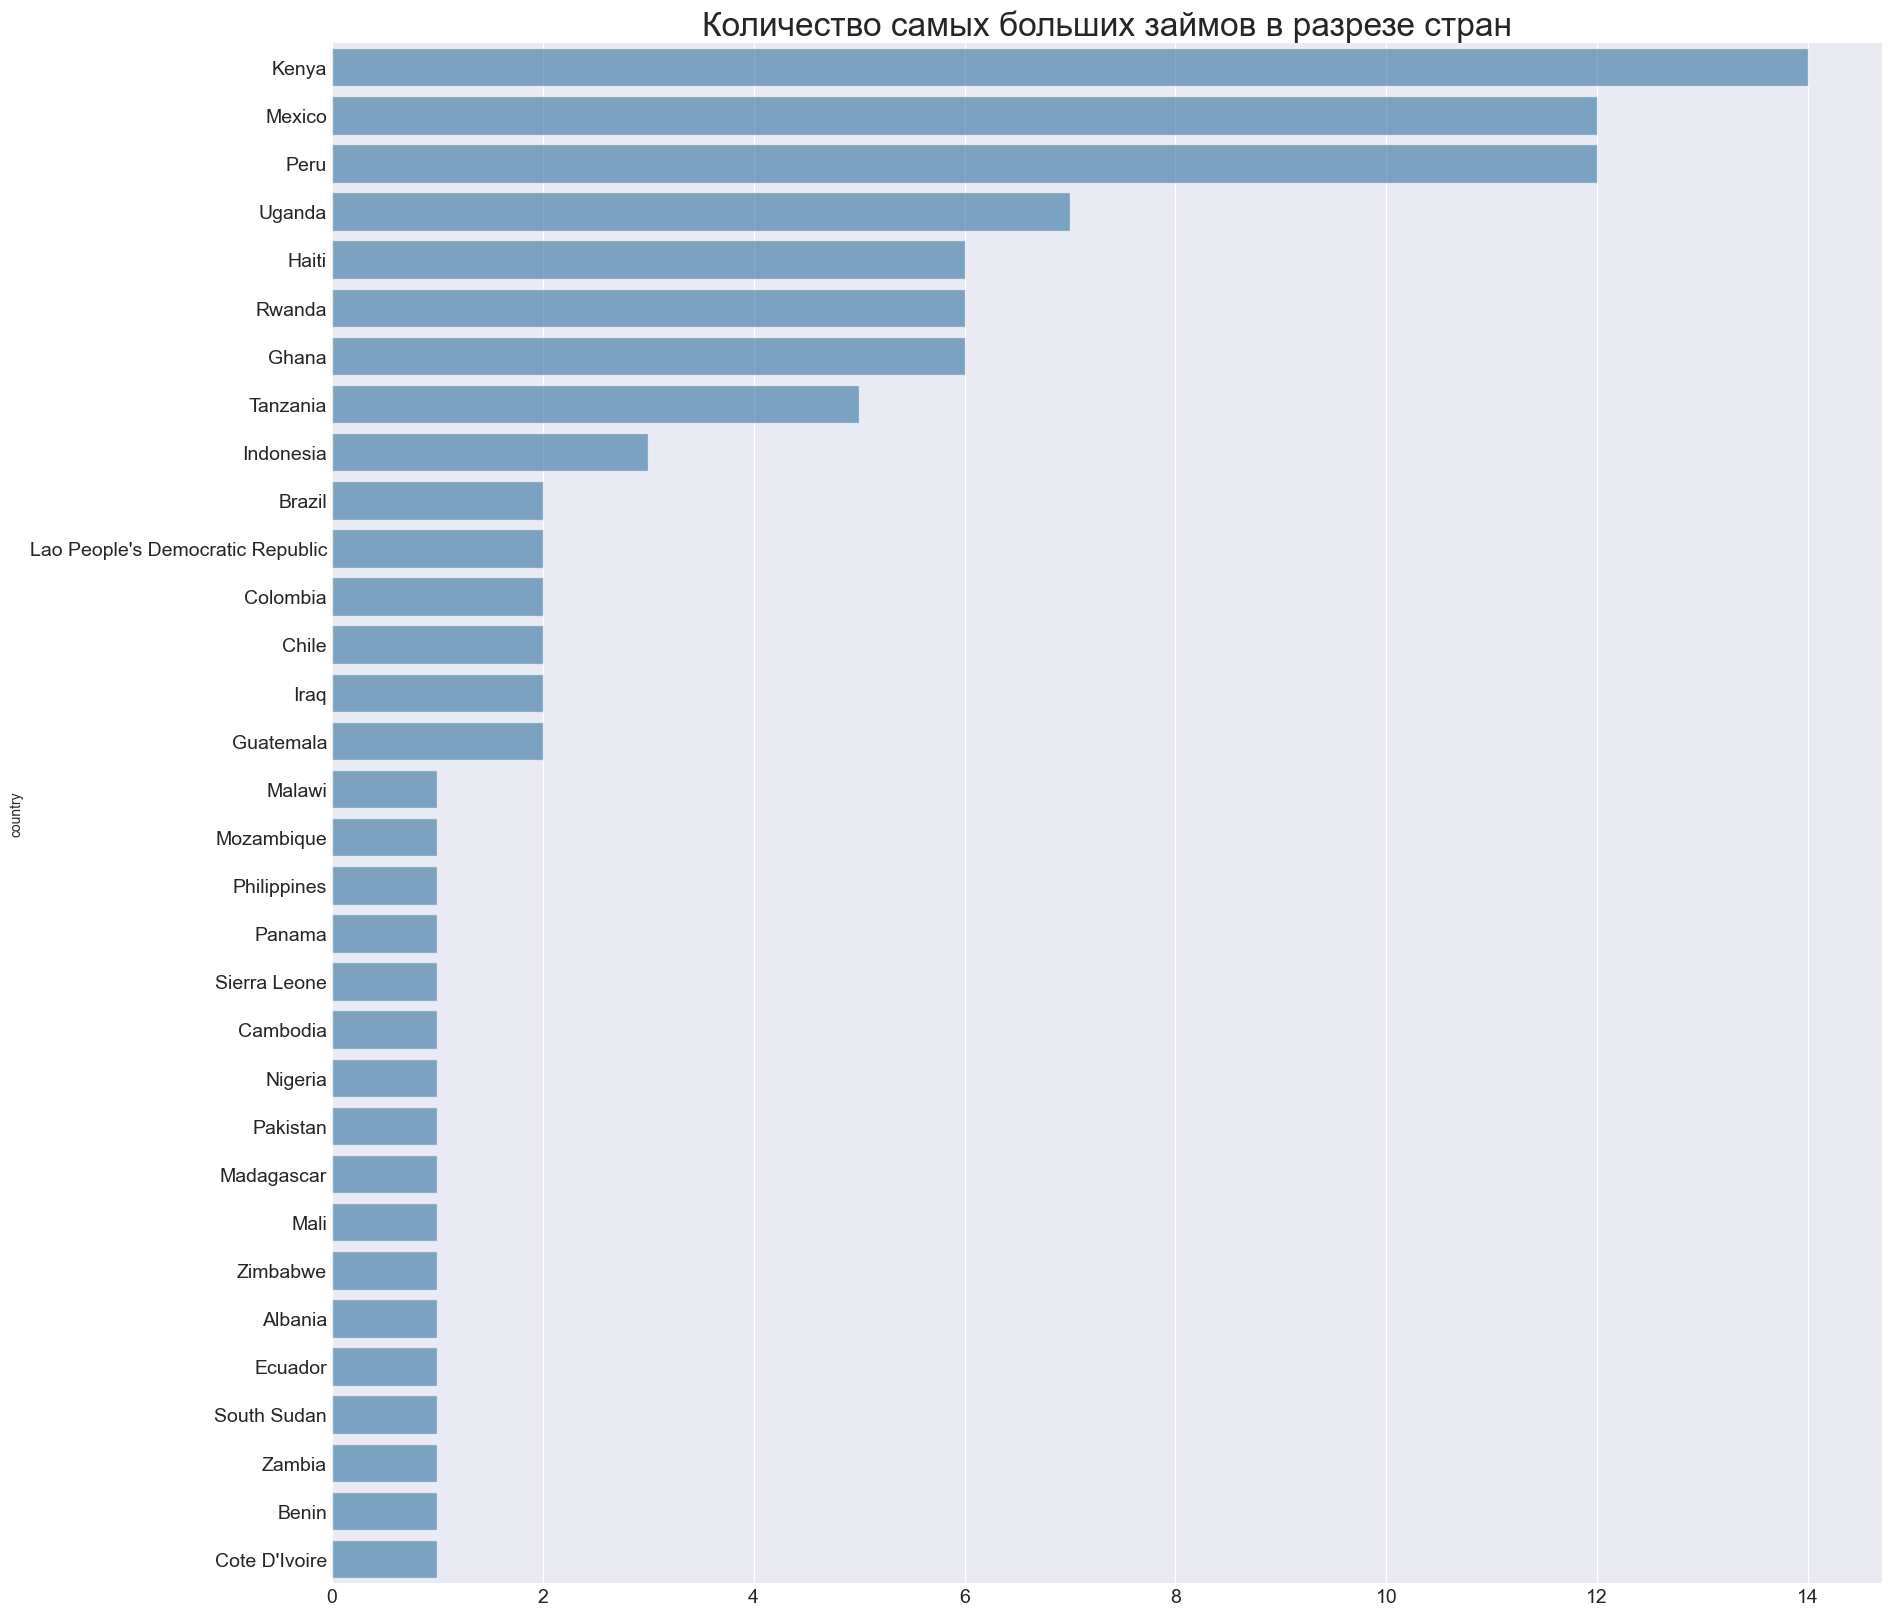

In [41]:
countriesHight = df_kiva_loans_trimmed_hight['country'].value_counts()

plt.figure(figsize=(20,20))
plt.title('Количество самых больших займов в разрезе стран', fontsize=24)
plt.tick_params(labelsize=14)
sns.barplot(y=countriesHight.index, x= countriesHight.values, alpha=0.6)
plt.show()

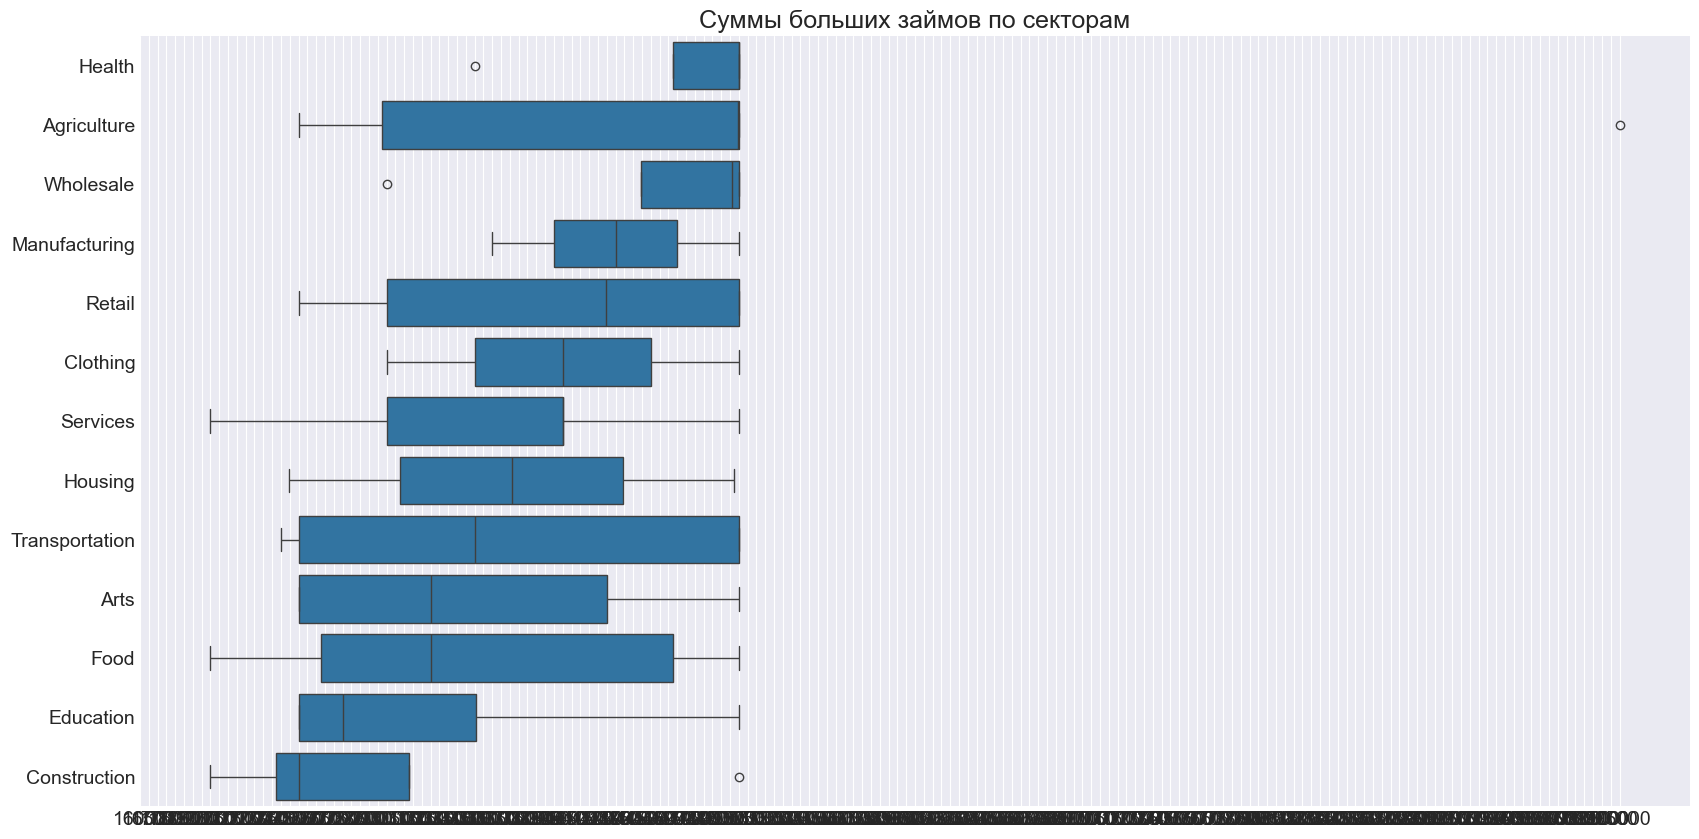

In [42]:
sector_mean_median_hight = df_kiva_loans_trimmed_hight.groupby(['sector'])['loan_amount'].agg(median='median', mean='mean').sort_values(by='median', ascending=False)
sort_order_hight = sector_mean_median_hight.index.to_list()

plt.figure(figsize=(20,10))
plt.title("Суммы больших займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed_hight['loan_amount'] + 1), 500))
plt.tick_params(labelsize=14)
sns.boxplot(x='loan_amount', y='sector', order=sort_order_hight, data=df_kiva_loans_trimmed_hight).set(ylabel=None, xlabel=None)
plt.show()

<Axes: ylabel='count'>

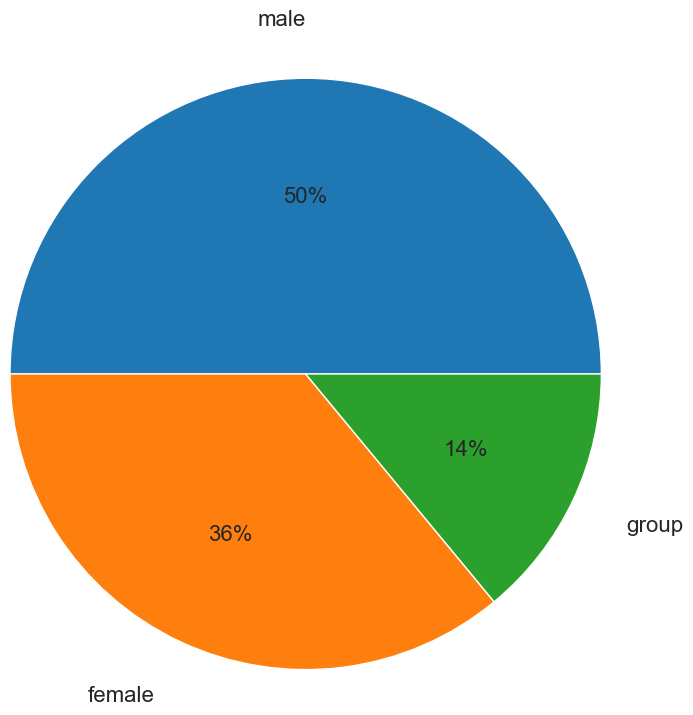

In [43]:
borrowersHight = df_kiva_loans_trimmed_hight['borrower_genders'].value_counts()
plot = borrowersHight.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)
plot

## Найти связь между странами(регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать?

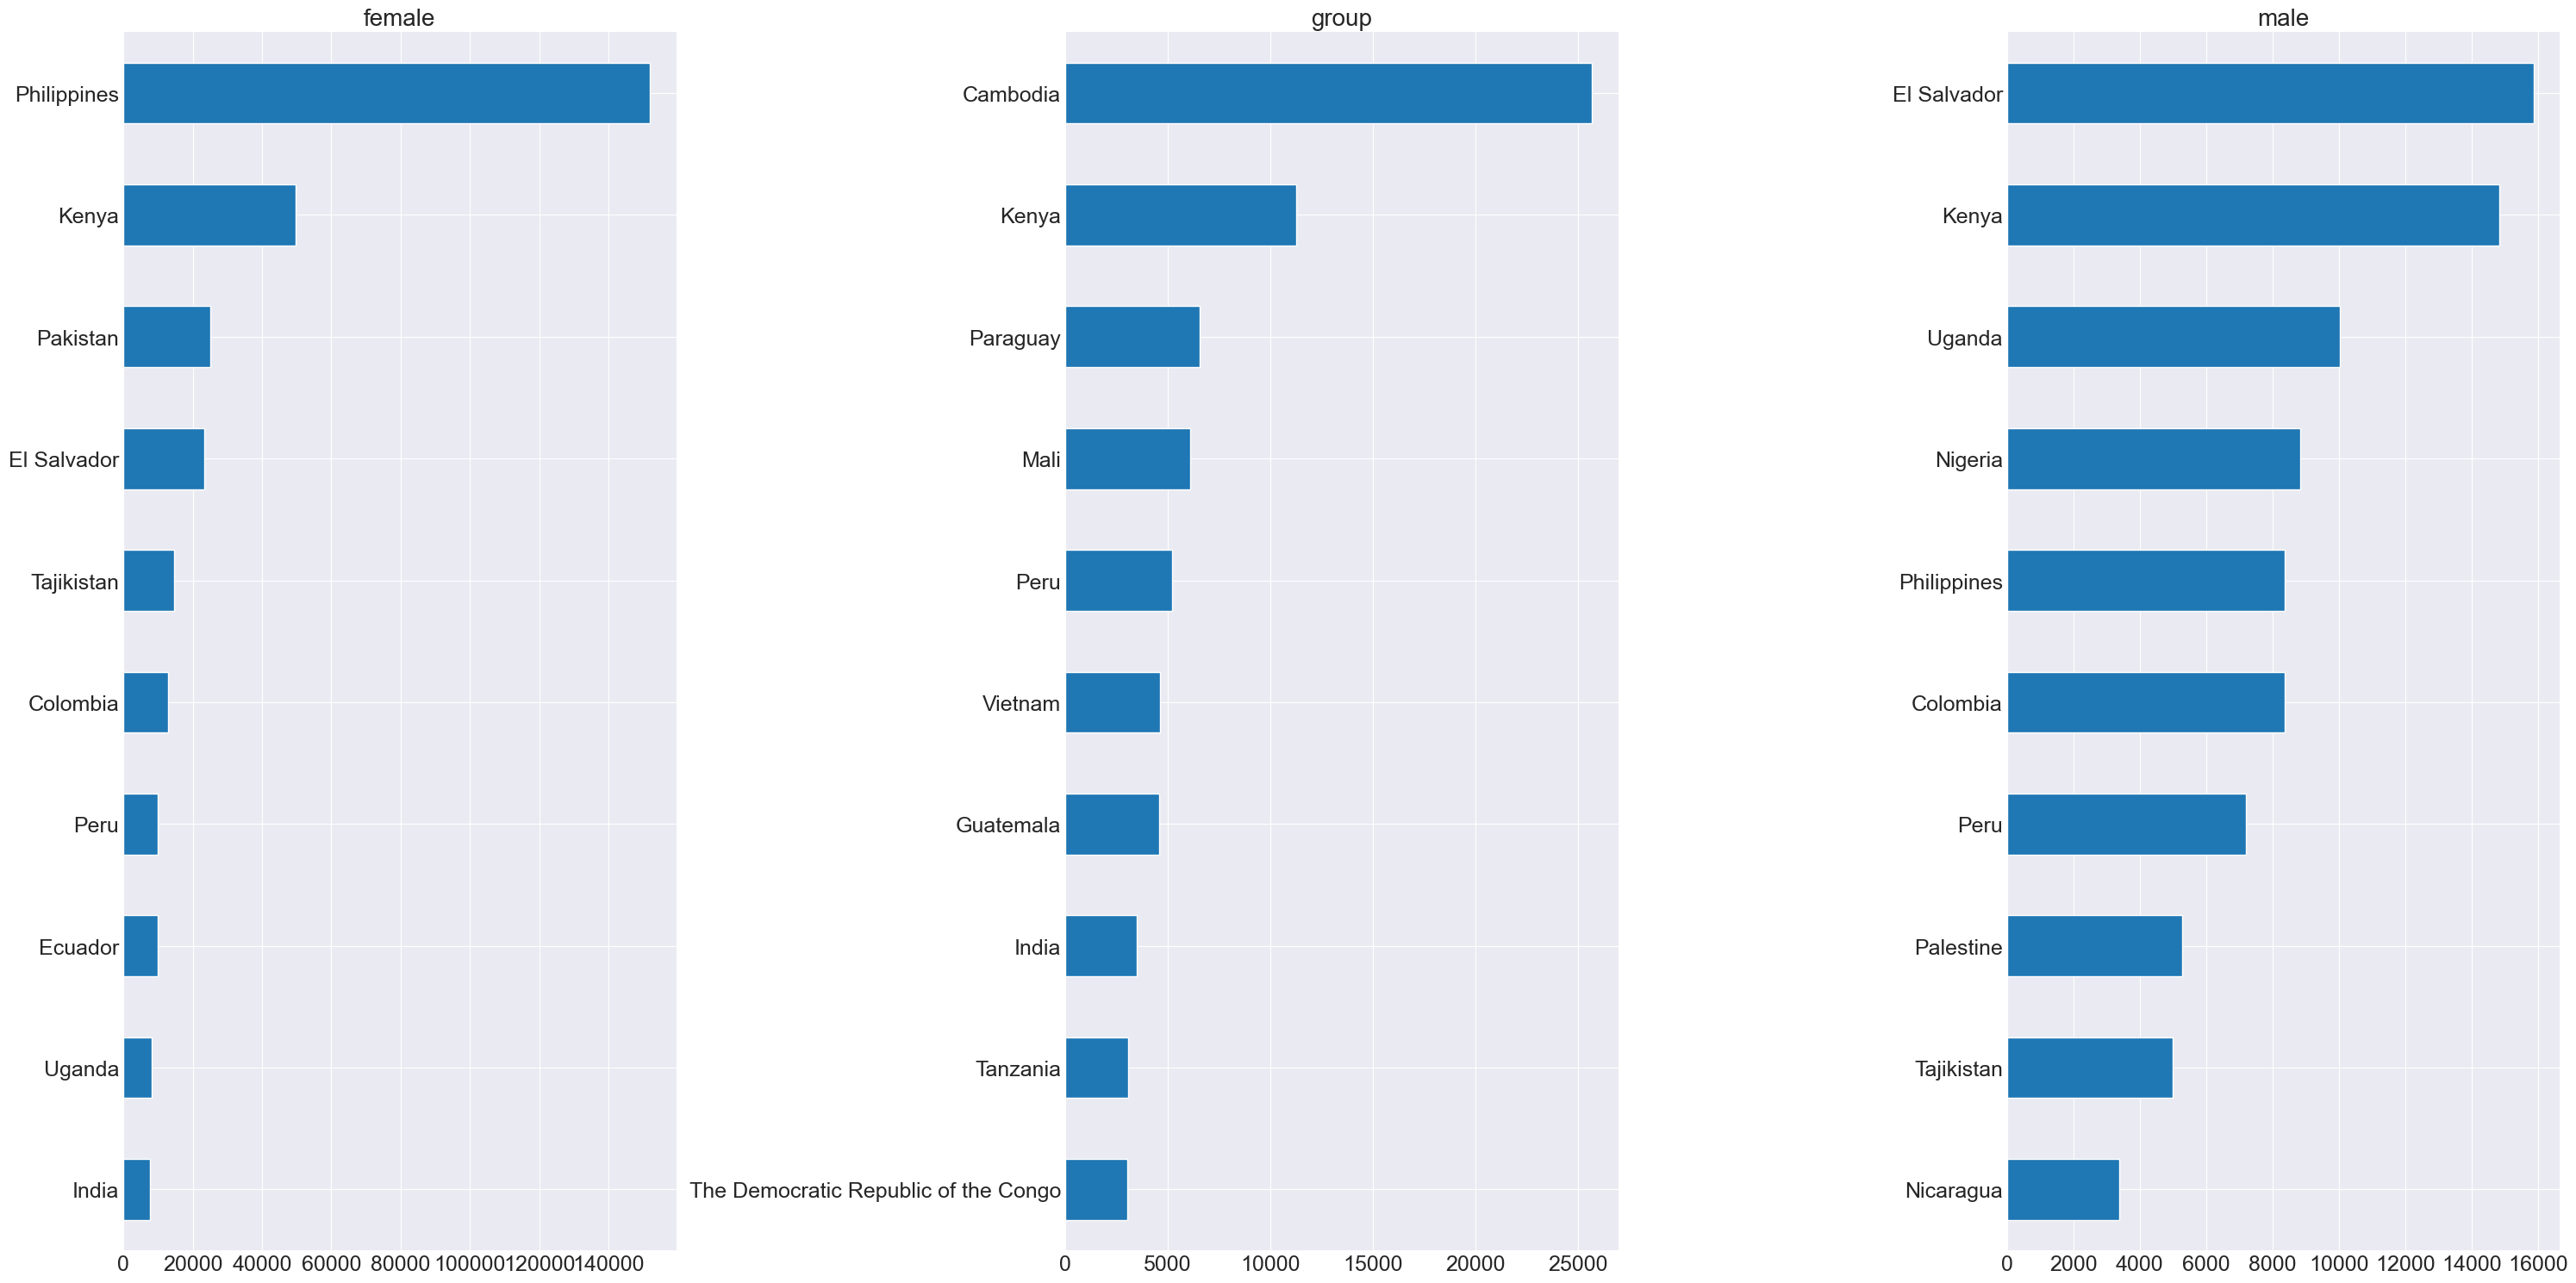

In [11]:
loans_by_sex_country = df_kiva_loans[df_kiva_loans['borrower_genders'].isin(borrowers.index.values)].groupby(['borrower_genders', 'country'])['loan_amount'].count().reset_index()
fig, axes = plt.subplots(1,3, sharex=False, squeeze=False, figsize=(30,15))
for ax, q in zip(axes.ravel(), loans_by_sex_country.borrower_genders.unique()):
    tmp_df = loans_by_sex_country[loans_by_sex_country.borrower_genders.eq(q)].dropna().sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    tmp_df.plot.barh(x='country', ax=ax, legend=None, fontsize=18)

In [44]:
sector_mean_median = df_kiva_loans.groupby(['sector'])['loan_amount'].agg(median='median', mean='mean').sort_values(by='median', ascending=False)
sort_order = sector_mean_median.index.to_list()
sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


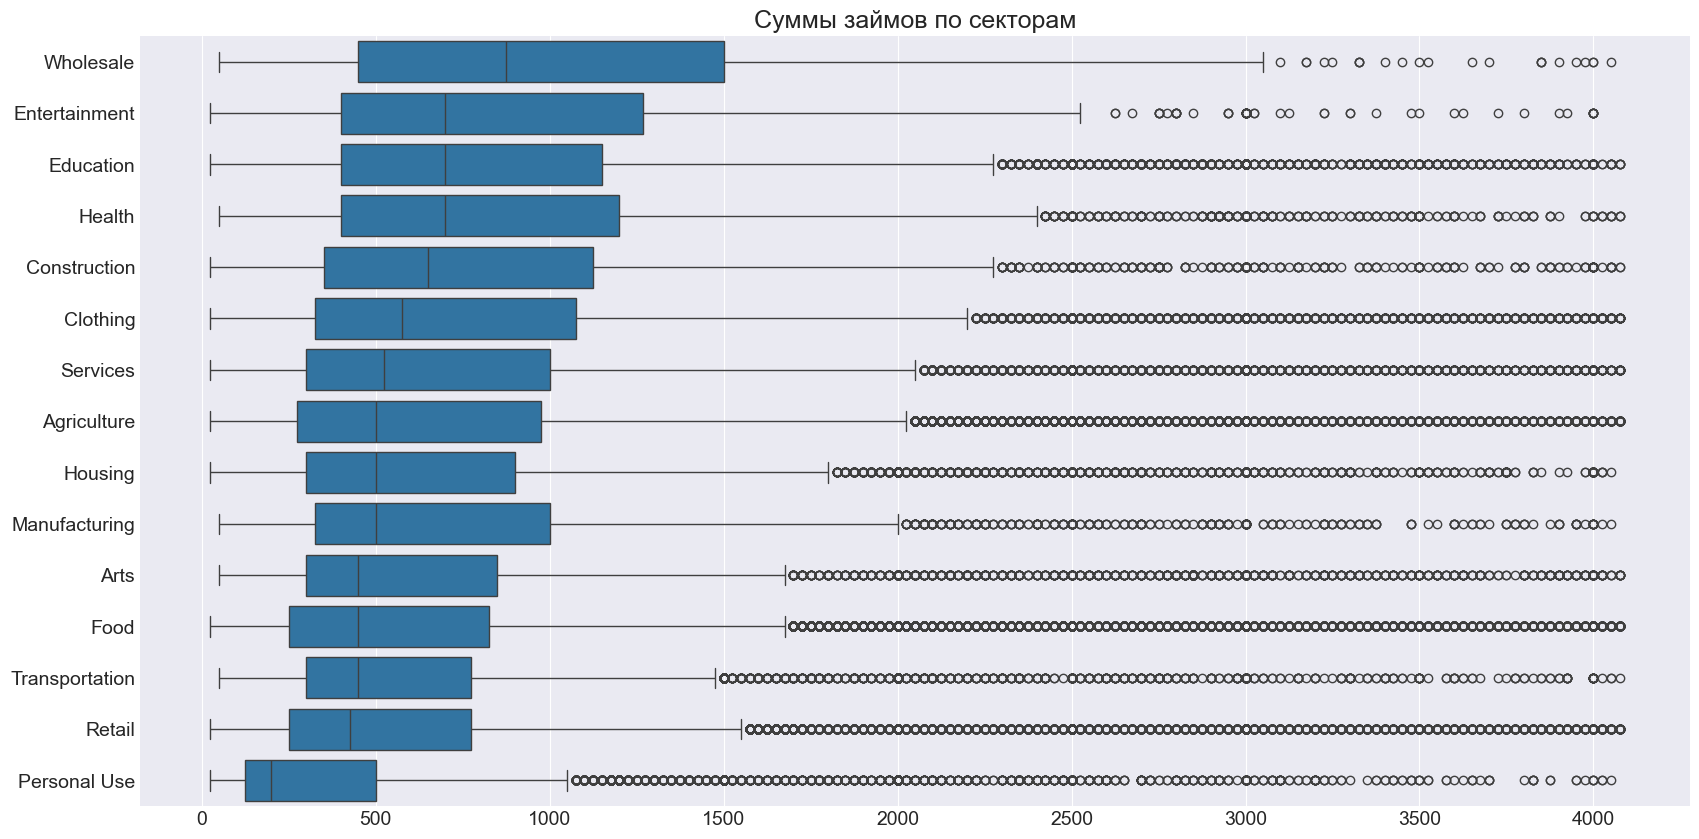

In [45]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount'] + 1), 500))
plt.tick_params(labelsize=14)
sns.boxplot(x='loan_amount', y='sector', order=sort_order, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

## 2.4.3 Распределение по макрорегионам

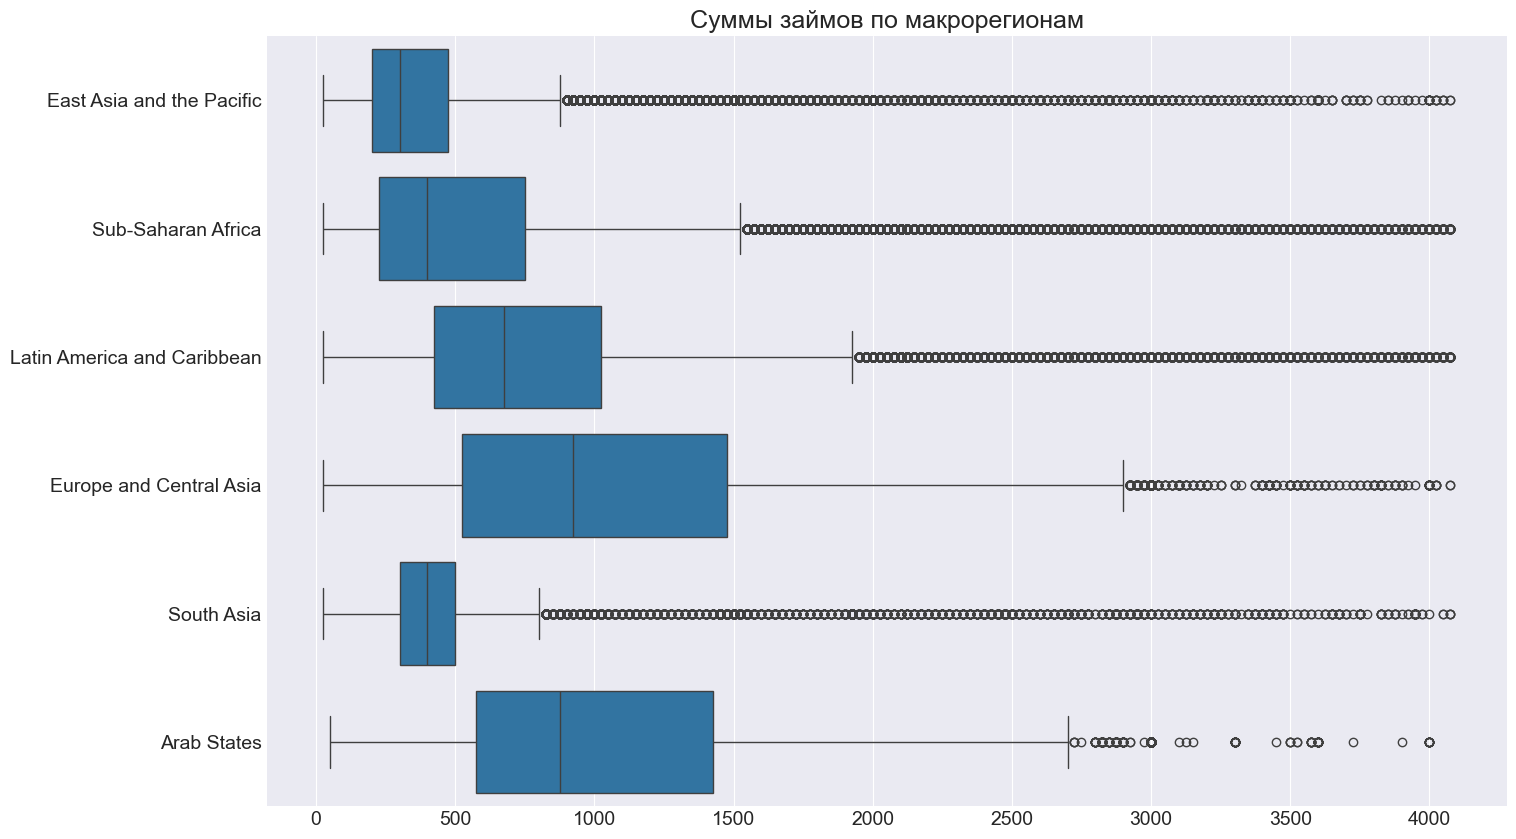

In [46]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount'] + 1), 500))
plt.tick_params(labelsize=14)
sns.boxplot(x='loan_amount', y='world_region', order=regions_list, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

# 2.5 Время ожидания средств

In [47]:
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

dates = ['posted_time', 'disbursed_time']

df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding']/timedelta(days=1)

dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:,'time_funding']>0)]
df_loans_dates_trimmed

C:\Users\Strannik\AppData\Local\Temp\ipykernel_9832\2291207991.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0])
C:\Users\Strannik\AppData\Local\Temp\ipykernel_9832\2291207991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0])
C:\Users\Strannik\AppData\Local\Temp\ipykernel_9832\2291207991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI,time_funding
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,4.0,6,NaN,female,irregular,2014-01-01,KEN,Sub-Saharan Africa,0.209375,28.650336
67,1080150,125.0,125.0,Energy,Services,purchase solar lanterns for resale.,KE,Kenya,NaN,KES,...,3.0,6,NaN,male,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.703970
114,1080151,125.0,125.0,Energy,Services,buy solar lanterns for sale.,KE,Kenya,NaN,KES,...,3.0,7,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.624109
195,1080149,125.0,125.0,Grocery Store,Food,ncrease my yams stock for sales,KE,Kenya,NaN,KES,...,3.0,6,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,19.566435
199,653295,2850.0,2850.0,Personal Housing Expenses,Housing,to pay for the construction of a hygienic toil...,VN,Vietnam,Hai Duong,VND,...,14.0,86,"#Elderly, #Low-profit FP, #Post-disbursed",group,bullet,2014-01-02,NaN,NaN,NaN,24.859051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668656,1334144,2000.0,2000.0,Weaving,Arts,to increase the physical space of her workshop...,MX,Mexico,Oaxaca,USD,...,13.0,59,"volunteer_pick, #Repeat Borrower, #Biz Durable...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.570625
668705,1334000,125.0,125.0,Farming,Agriculture,to purchase improved farm inputs that will inc...,NG,Nigeria,Kaduna,NGN,...,19.0,5,"#Vegan, #Parent, #Schooling",male,bullet,2017-07-05,NGA,Sub-Saharan Africa,0.258811,6.782963
668763,1333718,300.0,300.0,Farming,Agriculture,purchase fertilizers.,UG,Uganda,Ishaka,UGX,...,7.0,8,#Elderly,male,monthly,2017-07-05,UGA,Sub-Saharan Africa,0.375300,9.942708
668921,1334147,1900.0,1900.0,Crafts,Arts,"to purchase raw materials (wool, dyes and fire...",MX,Mexico,Oaxaca,USD,...,13.0,62,"#Repeat Borrower, #Unique, #Fabrics, #Job Crea...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.568808


C:\Users\Strannik\AppData\Local\Temp\ipykernel_9832\344311111.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)


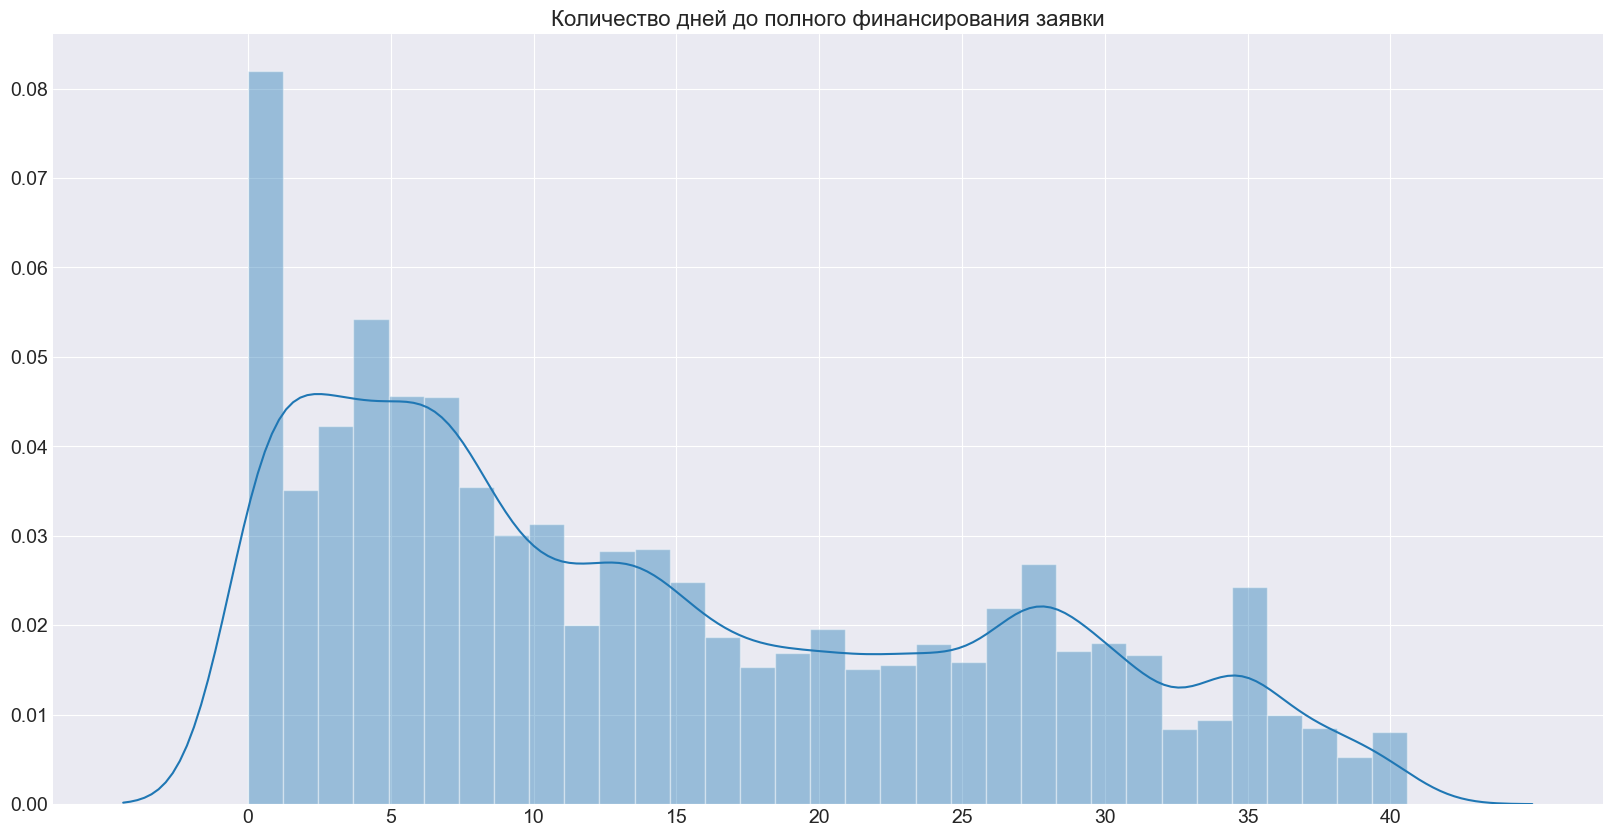

In [48]:
plt.figure(figsize=(20,10))
plt.title("Количество дней до полного финансирования заявки", fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding'] + 1), 5))
plt.tick_params(labelsize=14)
sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

# 2.5.3 Время ожидания и страны

In [49]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country']).agg({'loan_amount': 'median', 'time_funding' : 'median', 'term_in_months' : 'median'}).reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')
df_country_median

,world_region,country,loan_amount,time_funding,term_in_months
42,Sub-Saharan Africa,Madagascar,775.0,0.026262,10.0
41,Sub-Saharan Africa,Liberia,775.0,0.680903,14.0
53,Sub-Saharan Africa,Togo,275.0,2.788854,9.0
10,East Asia and the Pacific,Philippines,375.0,4.071389,10.0
56,Sub-Saharan Africa,Zimbabwe,500.0,5.655365,8.0
48,Sub-Saharan Africa,Rwanda,1600.0,5.888854,8.0
26,Latin America and Caribbean,Haiti,325.0,6.713021,71.0
34,South Asia,Pakistan,450.0,8.999288,13.0
40,Sub-Saharan Africa,Kenya,325.0,9.000480,11.0
17,Europe and Central Asia,Tajikistan,500.0,9.428015,13.0


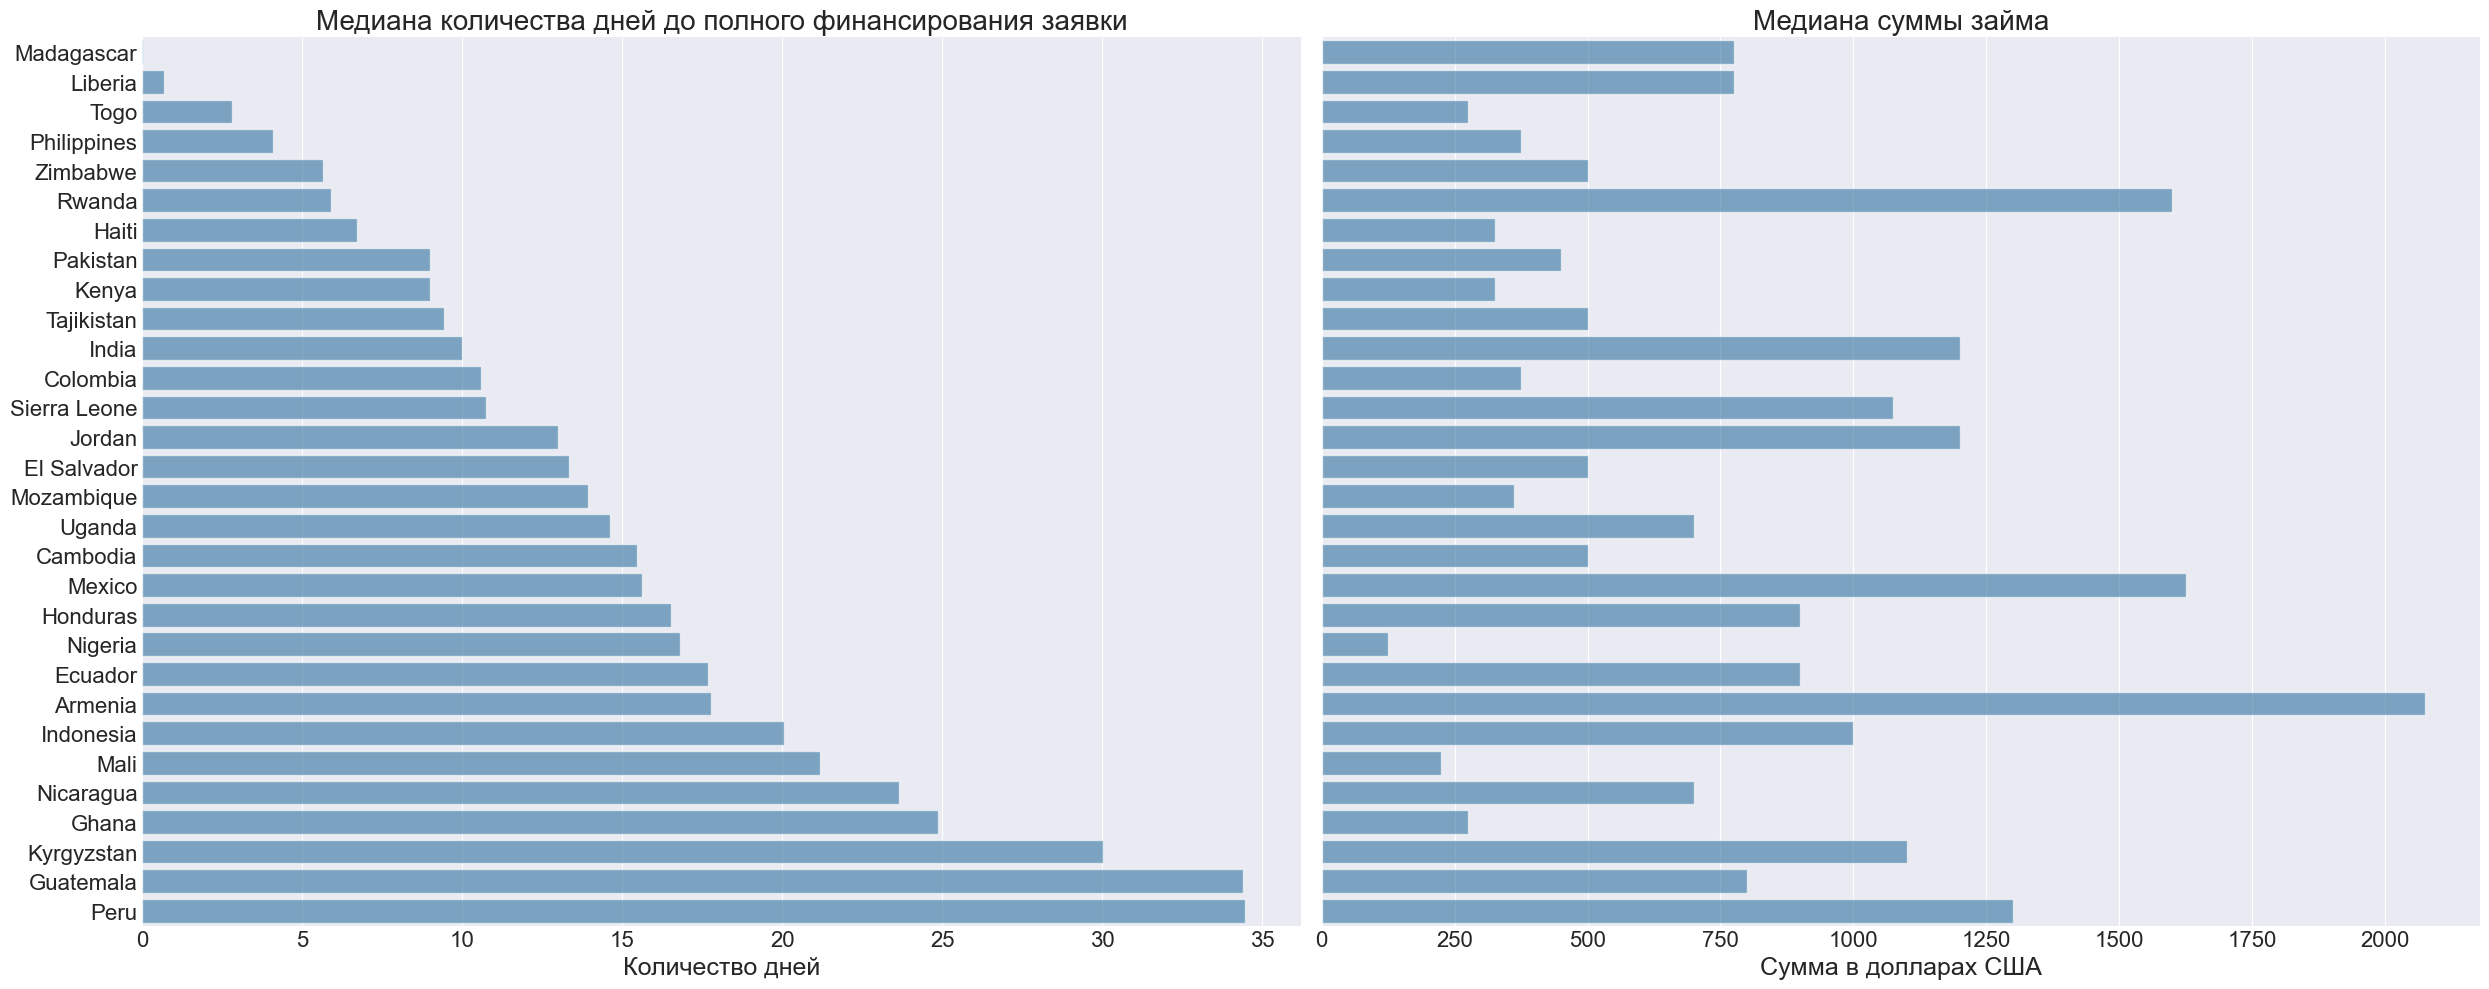

In [50]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(25, 10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана количества дней до полного финансирования заявки", fontsize=20)
ax[0].set_xlabel("Количество дней", fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel("Сумма в долларах США", fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

# 2.6 Сумма кредита и время погашения

In [51]:
df_country_median = df_country_median.sort_values(by='term_in_months')
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']
df_country_median

,world_region,country,loan_amount,time_funding,term_in_months,monthly_repayment
44,Sub-Saharan Africa,Mali,225.0,21.175515,5.0,45.000000
21,Latin America and Caribbean,Colombia,375.0,10.581377,6.0,62.500000
56,Sub-Saharan Africa,Zimbabwe,500.0,5.655365,8.0,62.500000
48,Sub-Saharan Africa,Rwanda,1600.0,5.888854,8.0,200.000000
45,Sub-Saharan Africa,Mozambique,362.5,13.939491,8.0,45.312500
53,Sub-Saharan Africa,Togo,275.0,2.788854,9.0,30.555556
50,Sub-Saharan Africa,Sierra Leone,1075.0,10.731603,9.0,119.444444
42,Sub-Saharan Africa,Madagascar,775.0,0.026262,10.0,77.500000
7,East Asia and the Pacific,Indonesia,1000.0,20.045289,10.0,100.000000
30,Latin America and Caribbean,Peru,1300.0,34.474016,10.0,130.000000


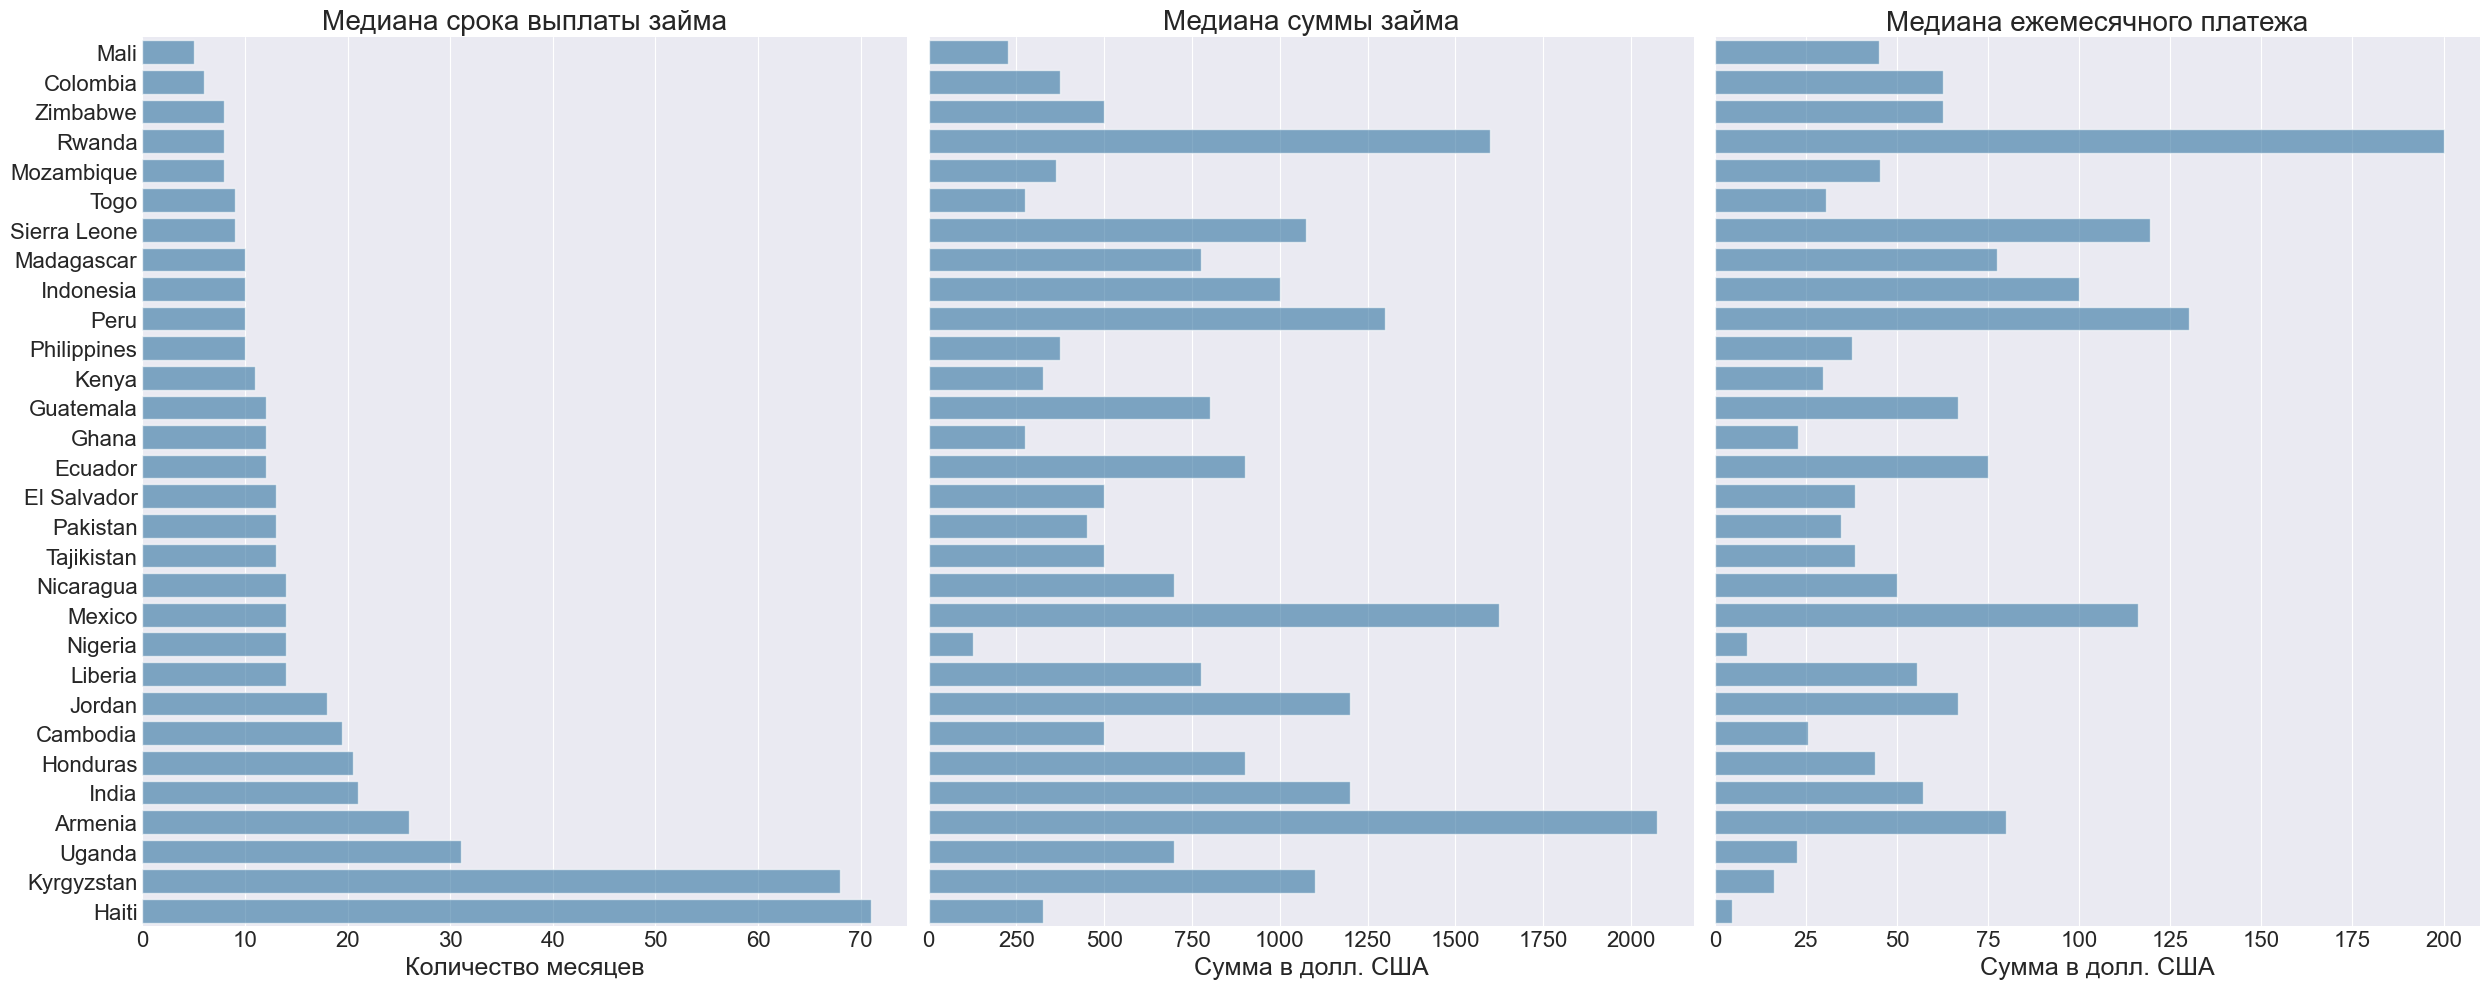

In [52]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)
plt.tight_layout()
plt.show()